# INFINITY TEAM

# Import Package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
from jcopml.plot import plot_missing_value
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.4.2
seaborn version :  0.11.0


#  Import Dataset

In [2]:
df = pd.read_csv("train_20D8GL3.csv")
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0  25150     360000    2          2         2   25     -1     -1     -1   
1  13470     240000    2          1         2   46      2      2     -2   
2   3092     320000    2          2         1   41      0      0      0   
3  13973      50000    2          2         2   24     -1     -1     -2   
4  10567      80000    1          3         1   52     -1      0      0   

   PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -1     -1     -1      20952      12590       3479       3435       8870   
1     -1      0     -1        456          0          0       2240       1681   
2      0      0      0      49846      53811      38717      35409      35036   
3     -2     -2     -2       2675          0          0          0          0   
4      0      0      0      35861      18521      19385      20561      21261   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       2020     12590      3479      3446      8870      2020     27043   
1       2267         0         0      2240         0      2267      3074   
2      35939      5000      2000      2000      3000      3000      1500   
3          0         0         0         0         0         0         0   
4      21457      1500      1500      1500      1028       876      1449   

   default_payment_next_month  
0                           0  
1                           0  
2                           0  
3                           1  
4                           0

__Deskripsi:__
- __ID__ : Unique ID of each client
- __LIMIT_BAL__ : Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family
- __SEX__: 1(male) and 2 (female)
- __EDUCATION__ : 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
- __MARRIAGE__ :1=married, 2=single, 3=divorced
- __AGE__ : 
- __PAY_0__ : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months)
     -2 = bayr penuh dan tidak ada transaksi dibulan tersebut
	 -1 = bayar penuh tepat waktu dan masih ada transaksi aktif
	  0 = bayar tapi tidak lunas / sesuai minimal tagihan
	  1 = bayar tapi telat sebulan
	  2 = bayar tapi telat 2 bulan
      .....
      8 = bayar tapi telat 8 bulan
- __PAY_2__ : Repayment status in August, 2005 (scale same as above)
- __PAY_3__ : Repayment status in July, 2005 (scale same as above)
- __PAY_4__ : Repayment status in June, 2005 (scale same as above)
- __PAY_5__ : Repayment status in May, 2005 (scale same as above)
- __PAY_6__ : Repayment status in April, 2005 (scale same as above)
- __BILL_AMT1__ : Amount of bill statement in September, 2005 (NT dollar)
- __BILL_AMT2__ : Amount of bill statement in August, 2005 (NT dollar)
- __BILL_AMT3__ : Amount of bill statement in July, 2005 (NT dollar)
- __BILL_AMT4__ : Amount of bill statement in June, 2005 (NT dollar)
- __BILL_AMT5__ : Amount of bill statement in May, 2005 (NT dollar)
- __BILL_AMT6__ : Amount of bill statement in April, 2005 (NT dollar)
- __PAY_AMT1__ : Amount of previous payment in September, 2005 (NT dollar)
- __PAY_AMT2__ : Amount of previous payment in August, 2005 (NT dollar)
- __PAY_AMT3__ : Amount of previous payment in July, 2005 (NT dollar)
- __PAY_AMT4__ : Amount of previous payment in June, 2005 (NT dollar)
- __PAY_AMT5__ : Amount of previous payment in May, 2005 (NT dollar)
- __PAY_AMT6__ : Amount of previous payment in April, 2005 (NT dollar)
- __default_payment_next_month__ : Target Variable: Default payment (1=yes, 0=no)




# Exploratory Data Analysis (EDA)

## 1. Descriptive Statistics

### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [4]:
for i in df.columns:
    print(f"{[i]} \n {df[i].unique()} \n")

['ID'] 
 [25150 13470  3092 ...  4378  8604 18049] 

['LIMIT_BAL'] 
 [360000 240000 320000  50000  80000 150000 260000 130000  60000  30000
 230000 500000 180000 120000  90000  70000 170000 440000  20000 200000
 100000 380000 370000 390000 300000 160000 350000 420000 110000 210000
 140000 280000  40000 400000 190000 480000 310000 410000 330000 460000
 220000 580000 270000 450000 250000 490000 430000 290000 600000 530000
  10000 340000 510000 470000 610000 620000 800000 550000 740000 560000
 590000 570000 520000 630000 780000 750000 720000 540000 690000 640000
 650000 710000 700000 660000 730000 680000 327680  16000] 

['SEX'] 
 [2 1] 

['EDUCATION'] 
 [2 1 3 5 4 6 0] 

['MARRIAGE'] 
 [2 1 3 0] 

['AGE'] 
 [25 46 41 24 52 29 36 31 28 34 27 56 30 38 26 39 43 42 33 59 32 40 37 47
 45 49 57 44 23 58 22 51 35 63 53 55 48 50 67 54 60 21 66 65 64 72 62 70
 61 73 75 69 74 71 68] 

['PAY_0'] 
 [-1  2  0 -2  1  3  5  4  7  6  8] 

['PAY_2'] 
 [-1  2  0 -2  3  1  4  6  5  7  8] 

['PAY_3'] 
 [-1 

In [5]:
df.nunique()

ID                            21000
LIMIT_BAL                        78
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              55
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            10
PAY_5                            10
PAY_6                            10
BILL_AMT1                     16700
BILL_AMT2                     16332
BILL_AMT3                     16142
BILL_AMT4                     15785
BILL_AMT5                     15400
BILL_AMT6                     15102
PAY_AMT1                       6336
PAY_AMT2                       6304
PAY_AMT3                       5964
PAY_AMT4                       5547
PAY_AMT5                       5486
PAY_AMT6                       5519
default_payment_next_month        2
dtype: int64

__A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?__

semua fitur memiliki tipe kolom yang sesuai begitu juga isinya tidak ada yang aneh, semua sesuai dengan tipe yaitu int hal ini dikarenakan beberapa fitur sudah label encoder terlebih dahulu dari sumber datanya hanya saja jumlah uniqe dengan deskripsi data tidak sesuai dimana ada beberapa fitur yang jumlah uniqenya lebih seperti __Education__


missing_value    %
ID                                      0  0.0
LIMIT_BAL                               0  0.0
SEX                                     0  0.0
EDUCATION                               0  0.0
MARRIAGE                                0  0.0
AGE                                     0  0.0
PAY_0                                   0  0.0
PAY_2                                   0  0.0
PAY_3                                   0  0.0
PAY_4                                   0  0.0
PAY_5                                   0  0.0
PAY_6                                   0  0.0
BILL_AMT1                               0  0.0
BILL_AMT2                               0  0.0
BILL_AMT3                               0  0.0
BILL_AMT4                               0  0.0
BILL_AMT5                               0  0.0
BILL_AMT6                               0  0.0
PAY_AMT1                                0  0.0
PAY_AMT2                                0  0.0
PAY_AMT3                                0  0.0
PAY_AMT4                                0  0.0
PAY_AMT5                                0  0.0
PAY_AMT6                                0  0.0
default_payment_next_month              0  0.0

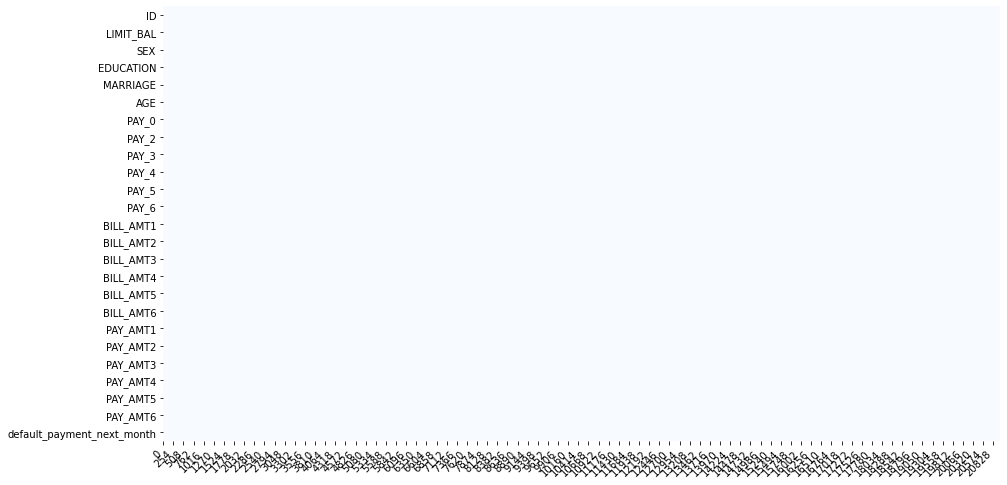

In [6]:
plot_missing_value(df, return_df= True)

__Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?__

untuk missing value sendiri tampak jelas bahwa tidak ada satupun fitur yang memiliki missing value


In [7]:
df.nunique()

ID                            21000
LIMIT_BAL                        78
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              55
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            10
PAY_5                            10
PAY_6                            10
BILL_AMT1                     16700
BILL_AMT2                     16332
BILL_AMT3                     16142
BILL_AMT4                     15785
BILL_AMT5                     15400
BILL_AMT6                     15102
PAY_AMT1                       6336
PAY_AMT2                       6304
PAY_AMT3                       5964
PAY_AMT4                       5547
PAY_AMT5                       5486
PAY_AMT6                       5519
default_payment_next_month        2
dtype: int64

In [8]:
df.describe()

ID      LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  21000.000000   21000.000000  21000.000000  21000.000000  21000.000000   
mean   14949.183667  167214.746667      1.607571      1.854190      1.551714   
std     8632.775153  128965.188482      0.488303      0.791628      0.521176   
min        1.000000   10000.000000      1.000000      0.000000      0.000000   
25%     7508.750000   50000.000000      1.000000      1.000000      1.000000   
50%    14939.500000  140000.000000      2.000000      2.000000      2.000000   
75%    22386.750000  240000.000000      2.000000      2.000000      2.000000   
max    29998.000000  800000.000000      2.000000      6.000000      3.000000   

                AGE        PAY_0         PAY_2         PAY_3        PAY_4  \
count  21000.000000  21000.00000  21000.000000  21000.000000  21000.00000   
mean      35.461619     -0.01119     -0.127238     -0.164857     -0.21819   
std        9.206628      1.12321      1.198957      1.198624      1.17221   
min       21.000000     -2.00000     -2.000000     -2.000000     -2.00000   
25%       28.000000     -1.00000     -1.000000     -1.000000     -1.00000   
50%       34.000000      0.00000      0.000000      0.000000      0.00000   
75%       41.000000      0.00000      0.000000      0.000000      0.00000   
max       75.000000      8.00000      8.000000      8.000000      8.00000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  21000.000000  21000.000000   21000.000000   21000.000000  2.100000e+04   
mean      -0.260952     -0.288667   51501.542381   49463.502667  4.723258e+04   
std        1.141454      1.151592   73453.641859   70866.586004  6.953988e+04   
min       -2.000000     -2.000000  -14386.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3564.750000    3000.000000  2.686250e+03   
50%        0.000000      0.000000   22578.000000   21550.000000  2.024200e+04   
75%        0.000000      0.000000   67876.250000   64918.250000  6.082675e+04   
max        8.000000      8.000000  746814.000000  743970.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   21000.000000   21000.000000   21000.000000   21000.000000   
mean    43387.372476   40398.551095   38931.194000    5686.349333   
std     64081.073110   60396.811177   59196.499234   16868.075695   
min   -170000.000000  -81334.000000 -209051.000000       0.000000   
25%      2332.000000    1759.000000    1242.750000     998.250000   
50%     19158.500000   18266.500000   17203.500000    2100.000000   
75%     55376.750000   50517.250000   49463.000000    5023.250000   
max    706864.000000  587067.000000  699944.000000  873552.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.100000e+04   21000.000000   21000.000000   21000.000000   
mean   5.923003e+03    5202.325333    4793.172000    4797.012952   
std    2.390953e+04   17006.416467   15467.403159   15270.031988   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    8.360000e+02     390.000000     284.000000     241.000000   
50%    2.011000e+03    1811.500000    1500.000000    1500.000000   
75%    5.000000e+03    4500.000000    4002.250000    4051.000000   
max    1.684259e+06  889043.000000  621000.000000  417990.000000   

            PAY_AMT6  default_payment_next_month  
count   21000.000000                21000.000000  
mean     5211.736762                    0.221190  
std     17698.795697                    0.415058  
min         0.000000                    0.000000  
25%       102.000000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

In [9]:
df.describe().transpose()

count           mean            std       min  \
ID                          21000.0   14949.183667    8632.775153       1.0   
LIMIT_BAL                   21000.0  167214.746667  128965.188482   10000.0   
SEX                         21000.0       1.607571       0.488303       1.0   
EDUCATION                   21000.0       1.854190       0.791628       0.0   
MARRIAGE                    21000.0       1.551714       0.521176       0.0   
AGE                         21000.0      35.461619       9.206628      21.0   
PAY_0                       21000.0      -0.011190       1.123210      -2.0   
PAY_2                       21000.0      -0.127238       1.198957      -2.0   
PAY_3                       21000.0      -0.164857       1.198624      -2.0   
PAY_4                       21000.0      -0.218190       1.172210      -2.0   
PAY_5                       21000.0      -0.260952       1.141454      -2.0   
PAY_6                       21000.0      -0.288667       1.151592      -2.0   
BILL_AMT1                   21000.0   51501.542381   73453.641859  -14386.0   
BILL_AMT2                   21000.0   49463.502667   70866.586004  -69777.0   
BILL_AMT3                   21000.0   47232.577762   69539.883466 -157264.0   
BILL_AMT4                   21000.0   43387.372476   64081.073110 -170000.0   
BILL_AMT5                   21000.0   40398.551095   60396.811177  -81334.0   
BILL_AMT6                   21000.0   38931.194000   59196.499234 -209051.0   
PAY_AMT1                    21000.0    5686.349333   16868.075695       0.0   
PAY_AMT2                    21000.0    5923.003476   23909.526477       0.0   
PAY_AMT3                    21000.0    5202.325333   17006.416467       0.0   
PAY_AMT4                    21000.0    4793.172000   15467.403159       0.0   
PAY_AMT5                    21000.0    4797.012952   15270.031988       0.0   
PAY_AMT6                    21000.0    5211.736762   17698.795697       0.0   
default_payment_next_month  21000.0       0.221190       0.415058       0.0   

                                 25%       50%        75%        max  
ID                           7508.75   14939.5   22386.75    29998.0  
LIMIT_BAL                   50000.00  140000.0  240000.00   800000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       75.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3564.75   22578.0   67876.25   746814.0  
BILL_AMT2                    3000.00   21550.0   64918.25   743970.0  
BILL_AMT3                    2686.25   20242.0   60826.75  1664089.0  
BILL_AMT4                    2332.00   19158.5   55376.75   706864.0  
BILL_AMT5                    1759.00   18266.5   50517.25   587067.0  
BILL_AMT6                    1242.75   17203.5   49463.00   699944.0  
PAY_AMT1                      998.25    2100.0    5023.25   873552.0  
PAY_AMT2                      836.00    2011.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1811.5    4500.00   889043.0  
PAY_AMT4                      284.00    1500.0    4002.25   621000.0  
PAY_AMT5                      241.00    1500.0    4051.00   417990.0  
PAY_AMT6                      102.00    1500.0    4000.00   528666.0  
default_payment_next_month      0.00       0.0       0.00        1.0

__Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)__

untuk nilai min secara keseluruhan tidak ada yang aneh, begitu juga dengan mean dan mediannya

In [10]:
df["default_payment_next_month"].value_counts()

0    16355
1     4645
Name: default_payment_next_month, dtype: int64

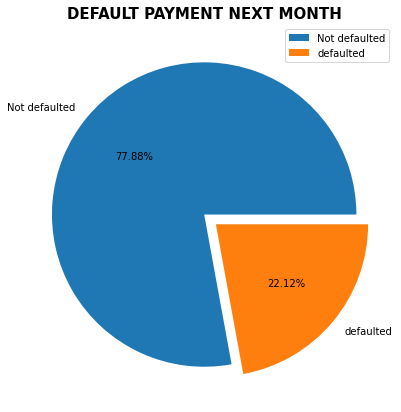

In [11]:
plt.figure(figsize = (7,7))
# plt.pie(df["default_payment_next_month"].value_counts(), labels=df["default_payment_next_month"].value_counts().index, autopct='%1.2f%%', labeldistance = 1.1)
# plt.title("default_payment_next_month")
# plt.show()

# plt.subplots(figsize=(20,6.5))
plt.pie(df['default_payment_next_month'].value_counts(),explode=[0,0.1],labels=['Not defaulted','defaulted'],autopct='%1.2f%%')
plt.title("DEFAULT PAYMENT NEXT MONTH", fontsize=15, fontweight='bold')
plt.legend()

**HASIL PENGAMATAN:**
Perbandingan nasabah gagal bayar tidak seimbang __(imbalnce)__. dimana 22,12% nasabah bermasalah yang gagal membayar tagihan kartu kredit, sedangkan 77,88% sisanya tidak bermasalah. Proporsi ini tidak seimbang sehingga mempengaruhi perlakuan pada model prediksi, diantaranya metrik evaluasi prediksi.

## Duplicated Data

In [12]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0
0


Tampak bahwa tidak terjadi kasus duplikat data

## 2.Univariate Analysis

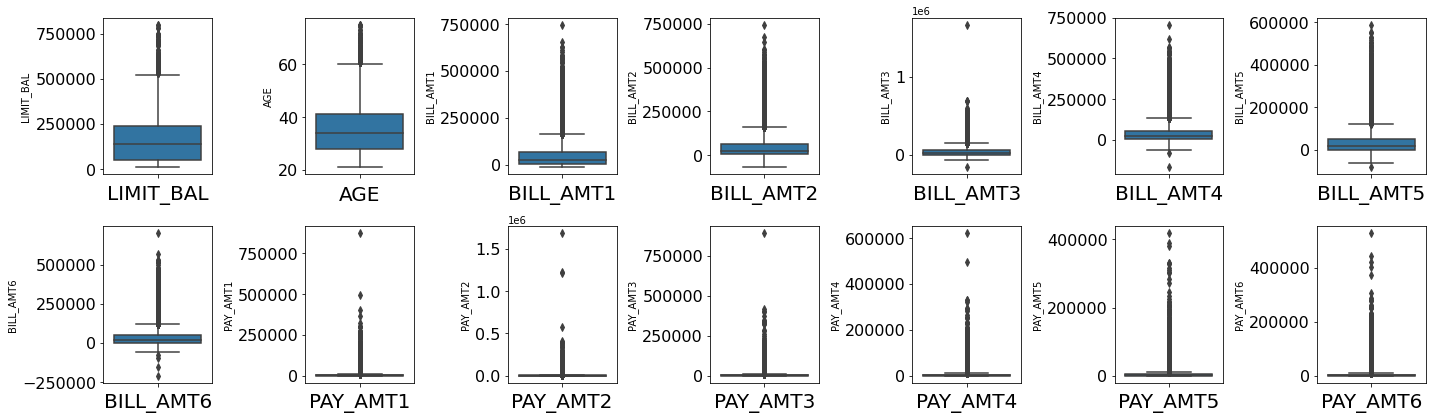

In [13]:
#NUMERIK

nums = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


plt.figure(figsize=(20, 20))
for i in range(len(nums)):
    plt.subplot(len(nums)//2, 7, i+1)
    ax = sns.boxplot(
        y = df[nums[i]]
        )
    ax.set_xlabel(str(nums[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

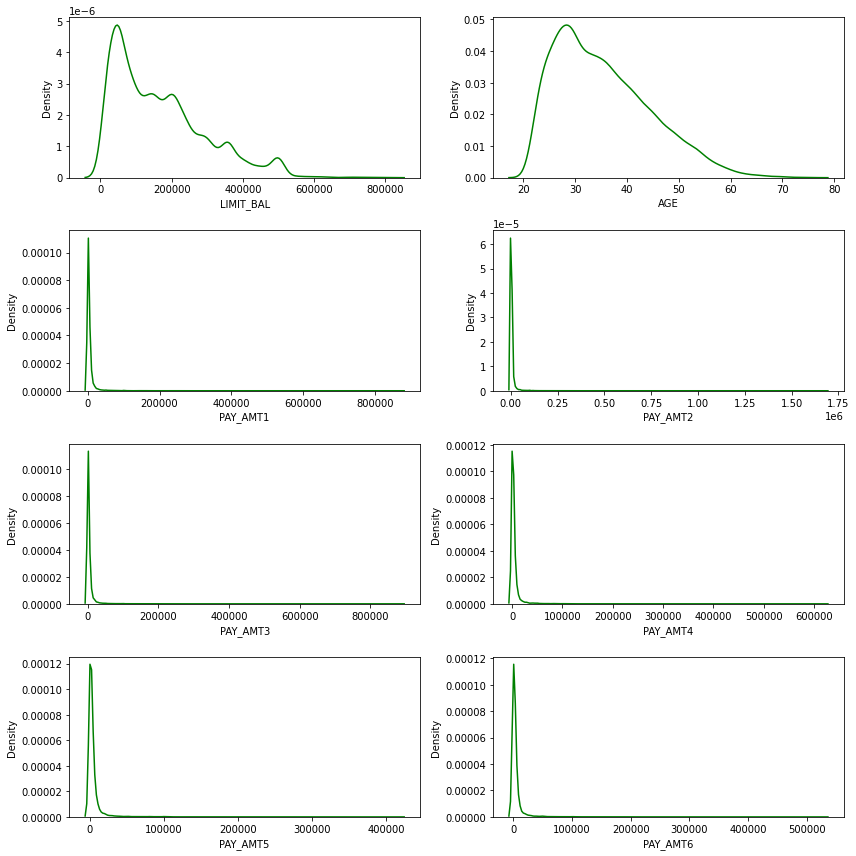

In [14]:
features = ['LIMIT_BAL','AGE', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(12, 12))
for i in range(0, 8):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

## Distribusi Fitur ke Target

Akan dibagi menjadi 4 Kelompok berdasarkan jenis fiturnya 
- __Kelompok 1 (yang fiturnya tidak berkelompok jenisnya)__ = 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'
- __Kelompok 2 (yang fiturnya Pay)__ = 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
- __Kelompok 3 (yang fiturnya BILL_AMT)__ = 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'
- __Kelompok 4 (yang fiturnya PAY_AMT)__ = 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'

#### __A. Kelompok 1 (yang fiturnya tidak berkelompok jenisnya)__ = 
 - 'LIMIT_BAL', 
 - 'SEX', 
 - 'EDUCATION',
 - 'MARRIAGE',
 - 'AGE'

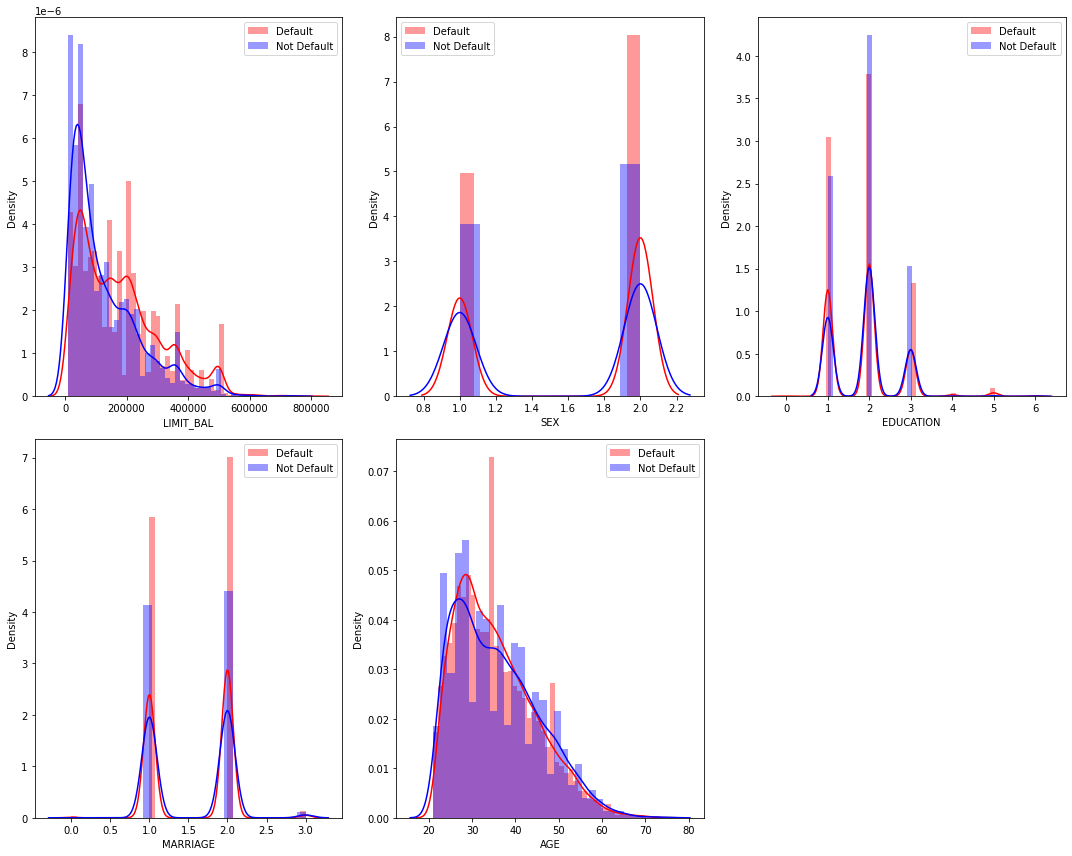

In [16]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']

a = plt.figure(figsize=(15, 12))

for i, j in enumerate(features):
    a.add_subplot(2, 3, i+1)
    sns.distplot(df[j][df.default_payment_next_month == 0], label='Default', color='r')
    sns.distplot(df[j][df.default_payment_next_month == 1],  label='Not Default', color='b')
    plt.legend()
    a.tight_layout()

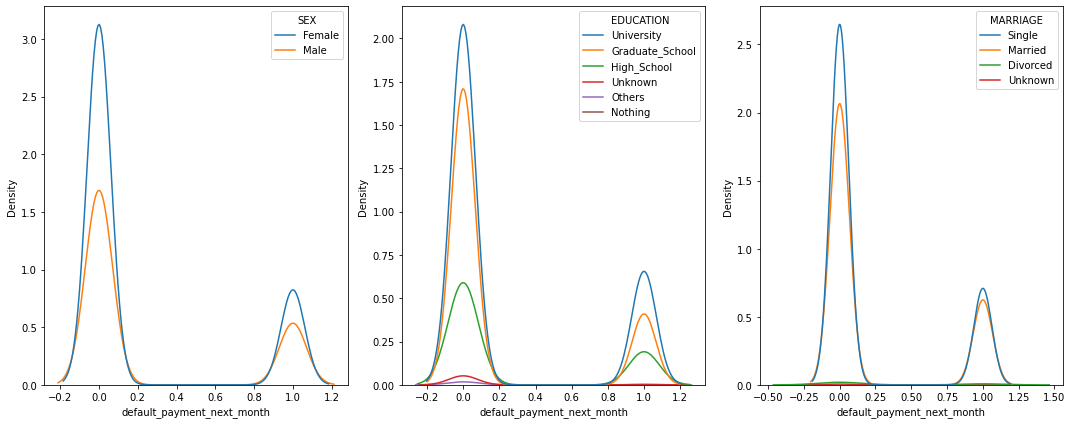

In [17]:
df['SEX'] = df['SEX'].replace(1, "Male")
df['SEX'] = df['SEX'].replace(2, "Female")
df['EDUCATION'] = df['EDUCATION'].replace(1, "Graduate_School")
df['EDUCATION'] = df['EDUCATION'].replace(2, "University")
df['EDUCATION'] = df['EDUCATION'].replace(3, "High_School")
df['EDUCATION'] = df['EDUCATION'].replace(4, "Others")
df['EDUCATION'] = df['EDUCATION'].replace(5, "Unknown")
df['EDUCATION'] = df['EDUCATION'].replace(6, "Unknown")
df['EDUCATION'] = df['EDUCATION'].replace(0, "Nothing")
df['MARRIAGE'] = df['MARRIAGE'].replace(1, "Married")
df['MARRIAGE'] = df['MARRIAGE'].replace(2, "Single")
df['MARRIAGE'] = df['MARRIAGE'].replace(3, "Divorced")
df['MARRIAGE'] = df['MARRIAGE'].replace(0, "Unknown")

cats = ['SEX', 'EDUCATION', 'MARRIAGE']
b = plt.figure(figsize=(15, 6))

for i in range(0, 3):
    b.add_subplot(1, 3, i+1) 
    sns.kdeplot(data=df, x='default_payment_next_month',  hue=cats[i])
#    plt.xlabel(features[i])
    b.tight_layout()

Pengamatan

- Untuk fitur SEX dimana Female tampaknya cenderung lebih berisiko untuk tidak default_payment_next_month
- Untuk fitur EDUCATION dimana Universtias, Graduate School dan High School memiliki peluang tidak Untuk fitur tidak default_payment_next_month
- Untuk fitur MARRIAGE dimana Single dan Married cenderung lebih berisiko untuk tidak default_payment_next_month
- Baik untuk fitur EDUCATION dan MARRIAGE mungkin sebaiknya menghapus unknown, others, divorced khususnya nothing

In [18]:
def exploration_plot(x):
    target = 'default_payment_next_month'
    
    if df[x].dtype == 'O':
        sns.set_style("whitegrid")
        sns.countplot(x, hue=target, data=df)
        plt.show()

    else:
        sns.set_style("darkgrid")
        sns.kdeplot(x, hue=target, data=df)
        plt.show()

__A1. LIMIT_BAL__

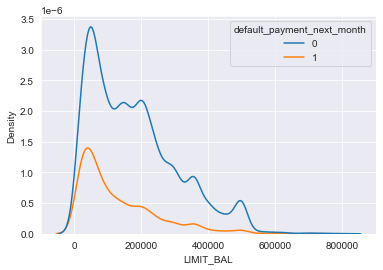

In [19]:
exploration_plot('LIMIT_BAL')

__SISA__

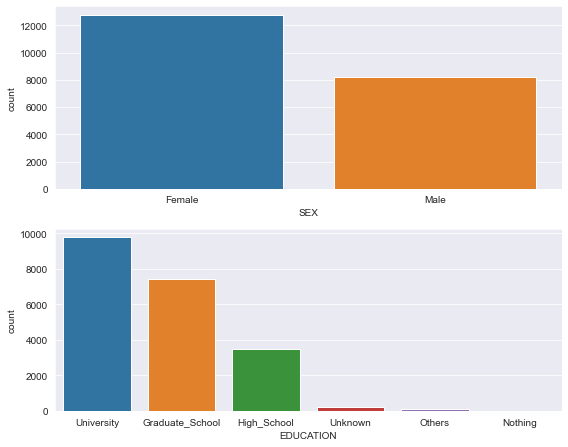

In [20]:
fig, ax = plt.subplots(figsize=(8, 9))
# df_sample = df.sample(1000, random_state=42)
for i in range(0, 2):
    plt.subplot(3, 1, i+1)
    sns.countplot(x = df[cats[i]], orient='v')
    plt.tight_layout()

__A2. SEX__

In [21]:
df['SEX'].value_counts()

Female    12759
Male       8241
Name: SEX, dtype: int64

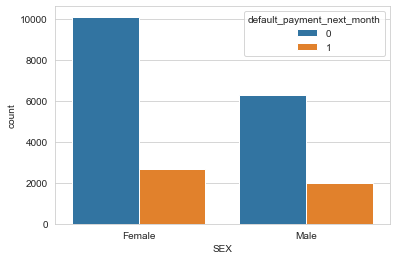

In [22]:
exploration_plot('SEX')

Text(0.5, 1.0, 'Jumlah keseluruhan SEX')

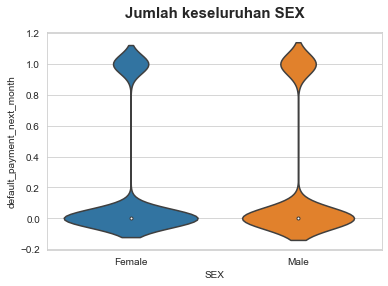

In [23]:
sns.violinplot(y='default_payment_next_month', x="SEX", data=df)
plt.title('Jumlah keseluruhan SEX', fontsize=15, fontweight='bold', pad=15)

__A3. EDUCATION__

In [24]:
df['EDUCATION'].value_counts()

University         9789
Graduate_School    7415
High_School        3467
Unknown             234
Others               85
Nothing              10
Name: EDUCATION, dtype: int64

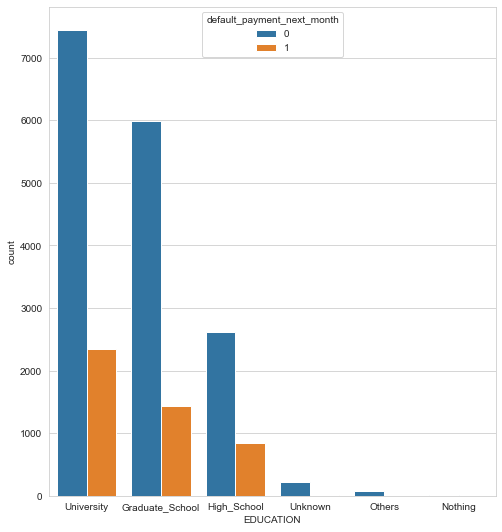

In [25]:
fig, ax = plt.subplots(figsize=(8, 9))
exploration_plot('EDUCATION')

hanya saja untuk unique tiap fitur ada yang aneh dimana pada __EDUCATION__ terdapat 2 value yang sama yaitu 5 dan 6 sama-sama berstatus unknown dan 0 yang tidak diketahui bermakna apa, sehingga kami memutuskan value bernilai 0, 5, dan 6 akan kami satukan menjadi unknown (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown juga 0=Nothing maka value 0,5 dan 6 akan kita satukan menjadi unknown)

In [26]:
df['EDUCATION'] = df['EDUCATION'].replace('Nothing', "Unknown")
df['EDUCATION'].value_counts()

University         9789
Graduate_School    7415
High_School        3467
Unknown             244
Others               85
Name: EDUCATION, dtype: int64

In [27]:
EDUCATION1 = df.groupby(['EDUCATION', 'default_payment_next_month']).agg(NumUsers=('ID','count')).reset_index()
EDUCATION2 = df.groupby('EDUCATION')['ID'].count().reset_index()
df_EDUCATION = EDUCATION1.merge(EDUCATION2, on='EDUCATION')
df_EDUCATION['ratio'] = round(df_EDUCATION['NumUsers']/df_EDUCATION['ID']*100,2)
df_EDUCATION

EDUCATION  default_payment_next_month  NumUsers    ID  ratio
0  Graduate_School                           0      5982  7415  80.67
1  Graduate_School                           1      1433  7415  19.33
2      High_School                           0      2618  3467  75.51
3      High_School                           1       849  3467  24.49
4           Others                           0        81    85  95.29
5           Others                           1         4    85   4.71
6       University                           0      7444  9789  76.04
7       University                           1      2345  9789  23.96
8          Unknown                           0       230   244  94.26
9          Unknown                           1        14   244   5.74

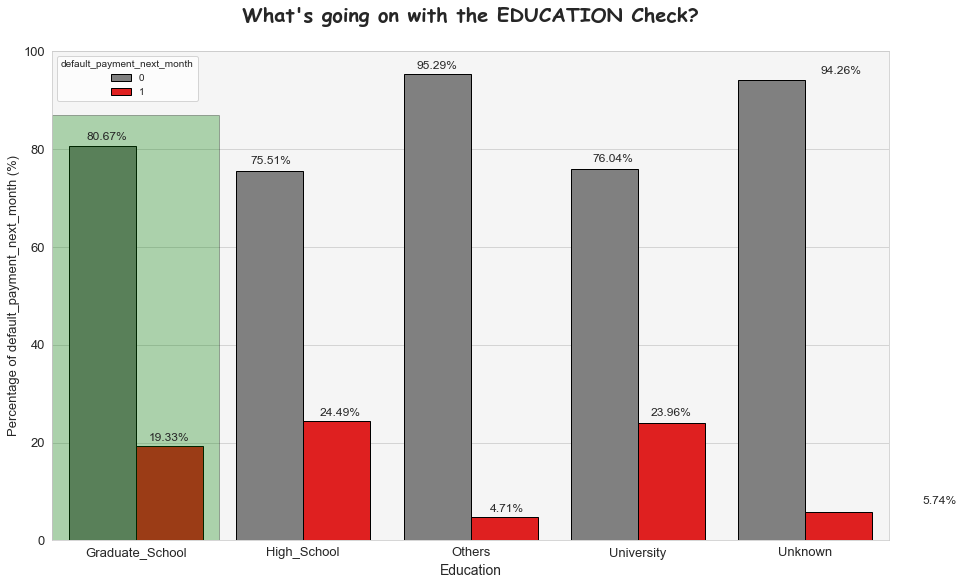

In [28]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.set_facecolor("#F5F5F5")

sns.barplot(x='EDUCATION', y='ratio', data=df_EDUCATION,
            hue='default_payment_next_month', palette=['grey', 'red'], edgecolor='black')

# for label in ax.containers:
#     ax.bar_label(label, fontweight='bold')

plt.title("What's going on with the EDUCATION Check?\n", fontsize=20, fontweight='bold', fontname="Comic Sans MS")
# plt.title("The payment method with Electronic check\nhas ~45% of customers which are Churn.",
#           fontsize=16, family='serif', loc='left', color='red')
plt.xlabel('Education', fontsize=14)
plt.ylabel('Percentage of default_payment_next_month (%)', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# highlight electrnic check
left, bottom, width, height = (-0.50, 0, 1, 87)
rect = mpatches.Rectangle((left,bottom),width,height, fill=True, 
                          alpha=0.3, facecolor='green', edgecolor='black')
plt.gca().add_patch(rect)
plt.text(x=-0.17, y=82.5, s='80.67%', ha='center', va='center', fontsize=12)
plt.text(x=0.20, y=21, s='19.33%', ha='center', va='center', fontsize=12)
plt.text(x=0.81, y=77.5, s='75.51%', ha='center', va='center', fontsize=12)
plt.text(x=1.22, y=26, s='24.49%', ha='center', va='center', fontsize=12)
# plt.text(x=1.81, y=102, s='100.00%', ha='center', va='center', fontsize=12)
plt.text(x=1.80, y=97, s='95.29%', ha='center', va='center', fontsize=12)
plt.text(x=2.22, y=6.5, s='4.71%', ha='center', va='center', fontsize=12)
plt.text(x=2.85, y=78, s='76.04%', ha='center', va='center', fontsize=12)
plt.text(x=3.20, y=26, s='23.96%', ha='center', va='center', fontsize=12)
plt.text(x=4.21, y=96, s='94.26%', ha='center', va='center', fontsize=12)
plt.text(x=4.80, y=8, s='5.74%', ha='center', va='center', fontsize=12)
plt.show()

Adapun insight yang dapat ditarik dari visualisasi di atas adalah sebagai berikut : 
* Education dengan status Graduate School memilik peluang besar untuk tidak payment default  begitu juga dengan default memiliki persentasi paling kecil jika dibandingkan dengan high school dan university


__A4. MARRIAGE__

In [29]:
df['MARRIAGE'].value_counts()

Single      11184
Married      9561
Divorced      219
Unknown        36
Name: MARRIAGE, dtype: int64

In [30]:
df['MARRIAGE'] = df['MARRIAGE'].replace(1, "Married")
df['MARRIAGE'] = df['MARRIAGE'].replace(2, "Single")
df['MARRIAGE'] = df['MARRIAGE'].replace(3, "Divorced")
df['MARRIAGE'] = df['MARRIAGE'].replace(0, "Unknown")
df['MARRIAGE'].value_counts()

Single      11184
Married      9561
Divorced      219
Unknown        36
Name: MARRIAGE, dtype: int64

In [31]:
MARRIAGE1 = df.groupby(['MARRIAGE', 'default_payment_next_month']).agg(NumUsers=('ID','count')).reset_index()
MARRIAGE2 = df.groupby('MARRIAGE')['ID'].count().reset_index()
df_MARRIAGE = MARRIAGE1.merge(MARRIAGE2, on='MARRIAGE')
df_MARRIAGE['ratio'] = round(df_MARRIAGE['NumUsers']/df_MARRIAGE['ID']*100,2)
df_MARRIAGE

MARRIAGE  default_payment_next_month  NumUsers     ID  ratio
0  Divorced                           0       156    219  71.23
1  Divorced                           1        63    219  28.77
2   Married                           0      7343   9561  76.80
3   Married                           1      2218   9561  23.20
4    Single                           0      8822  11184  78.88
5    Single                           1      2362  11184  21.12
6   Unknown                           0        34     36  94.44
7   Unknown                           1         2     36   5.56

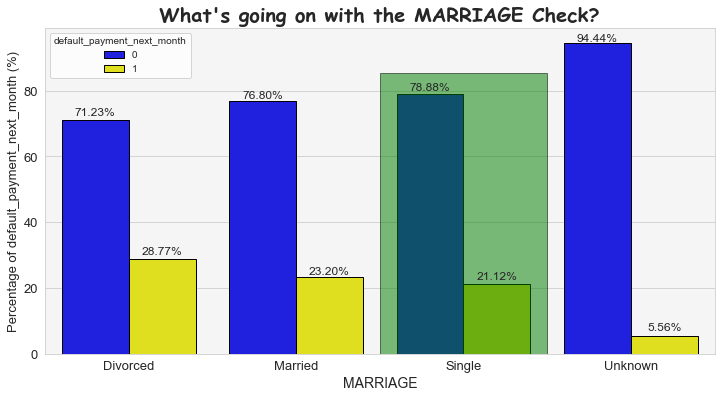

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor("#F5F5F5")

sns.barplot(x='MARRIAGE', y='ratio', data=df_MARRIAGE,
            hue='default_payment_next_month', palette=['blue', 'yellow'], edgecolor='black')

# for label in ax.containers:
#     ax.bar_label(label, fontweight='bold')

plt.title("What's going on with the MARRIAGE Check?", fontsize=20, fontweight='bold', fontname="Comic Sans MS")
# plt.title("The payment method with Electronic check\nhas ~45% of customers which are Churn.",
#           fontsize=16, family='serif', loc='left', color='red')
plt.xlabel('MARRIAGE', fontsize=14)
plt.ylabel('Percentage of default_payment_next_month (%)', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# highlight electrnic check
left, bottom, width, height = (1.5, 0, 1, 85.5)
rect = mpatches.Rectangle((left,bottom),width,height, fill=True, 
                          alpha=0.3, facecolor='green', edgecolor='black')
plt.gca().add_patch(rect)
plt.gca().add_patch(rect)
plt.text(x=-0.20, y=73.5, s='71.23%', ha='center', va='center', fontsize=12)
plt.text(x=0.20, y=31, s='28.77%', ha='center', va='center', fontsize=12)
plt.text(x=0.80, y=78.5, s='76.80%', ha='center', va='center', fontsize=12)
plt.text(x=1.20, y=25, s='23.20%', ha='center', va='center', fontsize=12)
plt.text(x=1.8, y=81, s='78.88%', ha='center', va='center', fontsize=12)
plt.text(x=2.20, y=23.5, s='21.12%', ha='center', va='center', fontsize=12)
plt.text(x=2.80, y=96, s='94.44%', ha='center', va='center', fontsize=12)
plt.text(x=3.20, y=8, s='5.56%', ha='center', va='center', fontsize=12)
plt.show()

Adapun insight yang dapat ditarik dari visualisasi di atas adalah :
kemungkinan terbesar yang bersatus single tidak payment default sedangkan devorced kemungkinan untuk payment default besar

__A4. AGE__

<AxesSubplot:xlabel='AGE', ylabel='count'>

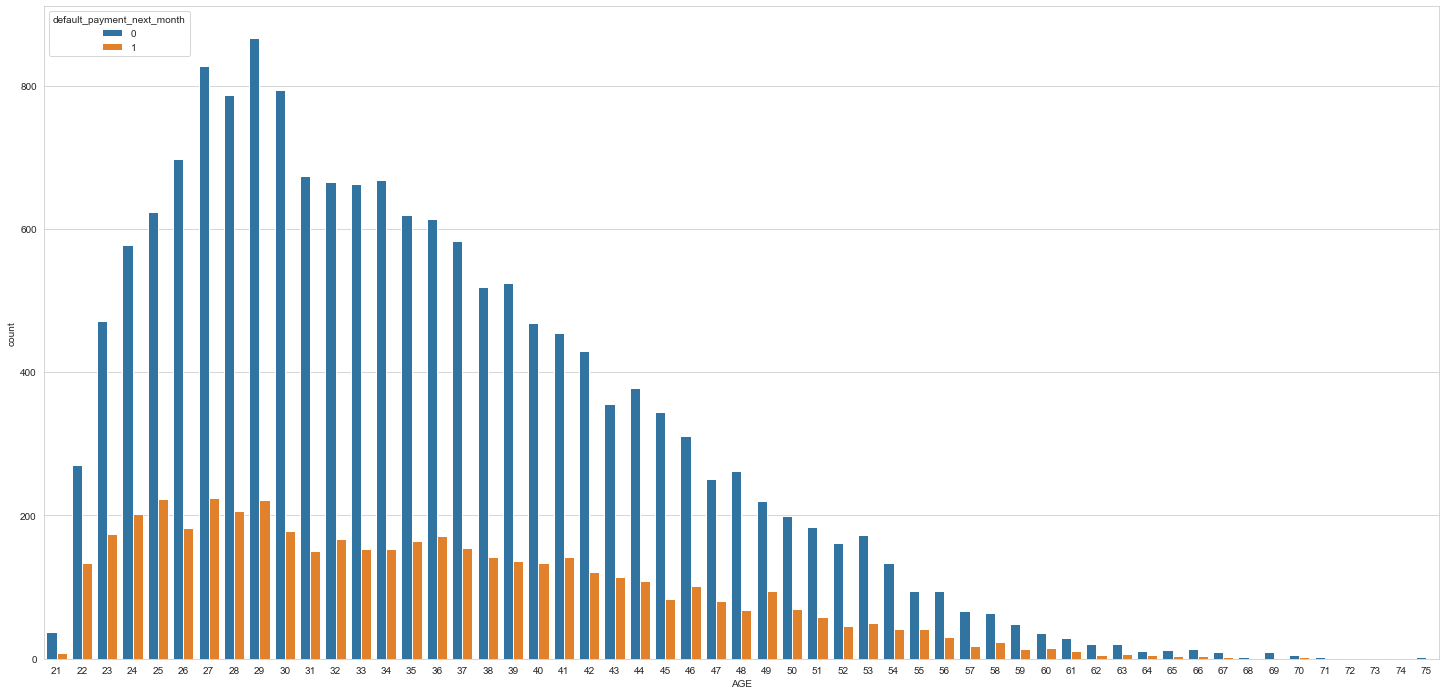

In [33]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'AGE', hue = 'default_payment_next_month', data = df)

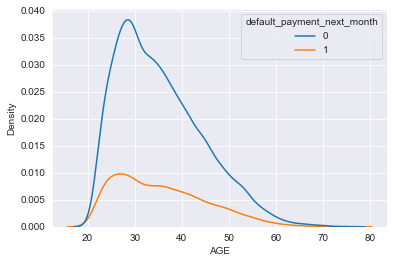

In [34]:
exploration_plot('AGE')

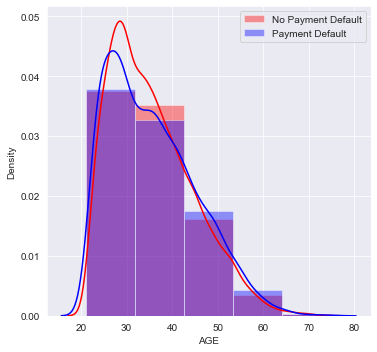

In [35]:
features = ['AGE']

a = plt.figure(figsize=(10, 5))

for i, j in enumerate(features):
    a.add_subplot(1, 2, i+1)
    sns.distplot(df[j][df.default_payment_next_month == 0], bins=5, label='No Payment Default', color='r')
    sns.distplot(df[j][df.default_payment_next_month == 1], bins=5, label='Payment Default', color='b')
    plt.legend()
    a.tight_layout()

Adapun insight yang dapat ditarik dari visualisasi di atas adalah sebagai berikut : 
* Range umur 20-30 hampir seimbang meskipun yang payment default lebih banyak
* Range umur 30-40 no payment default lebih banyak dibandingkan payment default
* Range umur 40-60 sama dengan dengan range 20-30 dimana payment default lebih banyak

In [36]:
df0 = df[(df['default_payment_next_month'] == 1) ]
df0.describe()

ID      LIMIT_BAL          AGE        PAY_0        PAY_2  \
count   4645.000000    4645.000000  4645.000000  4645.000000  4645.000000   
mean   14678.651884  128699.177610    35.576749     0.675565     0.465662   
std     8488.332890  114689.050266     9.628118     1.377973     1.499768   
min        1.000000   10000.000000    21.000000    -2.000000    -2.000000   
25%     7451.000000   50000.000000    28.000000     0.000000     0.000000   
50%    14584.000000   90000.000000    34.000000     1.000000     0.000000   
75%    21524.000000  190000.000000    42.000000     2.000000     2.000000   
max    29998.000000  740000.000000    75.000000     8.000000     7.000000   

             PAY_3        PAY_4        PAY_5        PAY_6      BILL_AMT1  \
count  4645.000000  4645.000000  4645.000000  4645.000000    4645.000000   
mean      0.365770     0.265877     0.186222     0.119699   47574.474273   
std       1.499896     1.516109     1.498630     1.492549   72330.060952   
min      -2.000000    -2.000000    -2.000000    -2.000000   -6676.000000   
25%      -1.000000    -1.000000    -1.000000    -1.000000    2823.000000   
50%       0.000000     0.000000     0.000000     0.000000   19820.000000   
75%       2.000000     2.000000     2.000000     0.000000   58267.000000   
max       8.000000     8.000000     8.000000     8.000000  613860.000000   

           BILL_AMT2      BILL_AMT3      BILL_AMT4      BILL_AMT5  \
count    4645.000000    4645.000000    4645.000000    4645.000000   
mean    46432.251668   44254.426911   40960.327449   38609.095156   
std     70326.328570   67283.903362   62861.122239   59748.055779   
min     -9119.000000  -61506.000000  -65167.000000  -53007.000000   
25%      2500.000000    2457.000000    1957.000000    1340.000000   
50%     20212.000000   19645.000000   18963.000000   18413.000000   
75%     56495.000000   52806.000000   49525.000000   47458.000000   
max    572834.000000  578971.000000  548020.000000  547880.000000   

           BILL_AMT6       PAY_AMT1       PAY_AMT2       PAY_AMT3  \
count    4645.000000    4645.000000    4645.000000    4645.000000   
mean    37211.797417    3279.548116    3257.713455    3041.347686   
std     57605.440752    9149.756335   10684.066771    9535.273054   
min    -94625.000000       0.000000       0.000000       0.000000   
25%      1076.000000       0.000000       0.000000       0.000000   
50%     17893.000000    1607.000000    1502.000000    1200.000000   
75%     46514.000000    3450.000000    3278.000000    3000.000000   
max    514975.000000  300000.000000  344467.000000  221876.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default_payment_next_month  
count    4645.000000    4645.000000    4645.000000                      4645.0  
mean     3064.171152    2972.813348    3179.088913                         1.0  
std      9860.577126   10065.350519   11421.530807                         0.0  
min         0.000000       0.000000       0.000000                         1.0  
25%         0.000000       0.000000       0.000000                         1.0  
50%      1000.000000    1000.000000    1000.000000                         1.0  
75%      2876.000000    3000.000000    2868.000000                         1.0  
max    292462.000000  330982.000000  250000.000000                         1.0

In [37]:
df1 = df[(df['default_payment_next_month'] == 0) ]
df1.describe()

ID      LIMIT_BAL           AGE         PAY_0         PAY_2  \
count  16355.000000   16355.000000  16355.000000  16355.000000  16355.000000   
mean   15026.017670  178153.592174     35.428921     -0.206237     -0.295628   
std     8672.077428  130689.681944      9.083392      0.953273      1.038681   
min        3.000000   10000.000000     21.000000     -2.000000     -2.000000   
25%     7527.500000   70000.000000     28.000000     -1.000000     -1.000000   
50%    15029.000000  150000.000000     34.000000      0.000000      0.000000   
75%    22582.500000  250000.000000     41.000000      0.000000      0.000000   
max    29997.000000  800000.000000     75.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6      BILL_AMT1  \
count  16355.000000  16355.000000  16355.000000  16355.000000   16355.000000   
mean      -0.315561     -0.355671     -0.387955     -0.404647   52616.872944   
std        1.050352      1.013003      0.980968      1.004699   73733.689064   
min       -2.000000     -2.000000     -2.000000     -2.000000  -14386.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000    3755.500000   
50%        0.000000      0.000000      0.000000      0.000000   23693.000000   
75%        0.000000      0.000000      0.000000      0.000000   70096.000000   
max        8.000000      8.000000      7.000000      7.000000  746814.000000   

           BILL_AMT2     BILL_AMT3      BILL_AMT4      BILL_AMT5  \
count   16355.000000  1.635500e+04   16355.000000   16355.000000   
mean    50324.411312  4.807841e+04   44076.679976   40906.776276   
std     70997.818745  7.014634e+04   64408.561955   60571.971745   
min    -69777.000000 -1.572640e+05 -170000.000000  -81334.000000   
25%      3140.500000  2.836500e+03    2428.000000    1826.000000   
50%     22332.000000  2.047500e+04   19271.000000   18223.000000   
75%     67455.000000  6.308150e+04   57184.000000   51816.000000   
max    743970.000000  1.664089e+06  706864.000000  587067.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2       PAY_AMT3  \
count   16355.000000   16355.000000  1.635500e+04   16355.000000   
mean    39419.521553    6369.907368  6.679975e+03    5816.066769   
std     59633.327438   18424.477829  2.643916e+04   18542.993418   
min   -209051.000000       0.000000  0.000000e+00       0.000000   
25%      1269.500000    1170.000000  1.017500e+03     607.000000   
50%     16928.000000    2481.000000  2.268000e+03    2000.000000   
75%     50314.000000    5700.000000  5.356000e+03    5000.000000   
max    699944.000000  873552.000000  1.684259e+06  889043.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default_payment_next_month  
count   16355.000000   16355.000000   16355.000000                     16355.0  
mean     5284.227270    5315.105717    5789.031122                         0.0  
std     16688.050174   16413.993766   19070.076037                         0.0  
min         0.000000       0.000000       0.000000                         0.0  
25%       390.000000     360.000000     300.000000                         0.0  
50%      1737.000000    1800.000000    1723.000000                         0.0  
75%      4600.000000    4691.500000    4546.500000                         0.0  
max    621000.000000  417990.000000  528666.000000                         0.0

Customer nasabah Bank Taiwan antara defaul dan tidak default memiliki rata-rata limit balance dimana customer default yang lebih rendah. Namun jika dilihat dari bill amount/tagihan nasabah rata-rata tagihan customer default dan tidak default hampir sama nilainya. Sementara itu, rata-rata pay amount/pembayaran terlihat jauh berbeda. Kemampuan bayar customer default rata-rata hanya 1/2 kali dari customer yang tidak default

In [38]:
h = df0.groupby(['SEX', 'EDUCATION', 'MARRIAGE',]).agg({'default_payment_next_month' :'count'}).sort_values('default_payment_next_month')
h

default_payment_next_month
SEX    EDUCATION       MARRIAGE                            
Male   Unknown         Single                             1
       High_School     Unknown                            1
Female Others          Single                             1
                       Married                            1
       High_School     Unknown                            1
Male   Others          Married                            2
Female Unknown         Married                            3
       Graduate_School Divorced                           3
       Unknown         Single                             5
Male   Unknown         Married                            5
       High_School     Divorced                           8
Female High_School     Divorced                           9
Male   Graduate_School Divorced                          10
       University      Divorced                          13
Female University      Divorced                          20
Male   High_School     Single                           150
Female High_School     Single                           155
Male   High_School     Married                          210
Female Graduate_School Married                          265
Male   Graduate_School Married                          268
Female High_School     Married                          315
Male   Graduate_School Single                           347
       University      Married                          433
                       Single                           535
Female Graduate_School Single                           540
       University      Single                           628
                       Married                          716

In [39]:
h.tail(5).sort_values('default_payment_next_month', ascending = False).reset_index()

SEX        EDUCATION MARRIAGE  default_payment_next_month
0  Female       University  Married                         716
1  Female       University   Single                         628
2  Female  Graduate_School   Single                         540
3    Male       University   Single                         535
4    Male       University  Married                         433

### __Kelompok 2 (yang fiturnya Pay)__ = 
- 'PAY_0',
- 'PAY_2', 
- 'PAY_3', 
- 'PAY_4', 
- 'PAY_5',
- 'PAY_6'

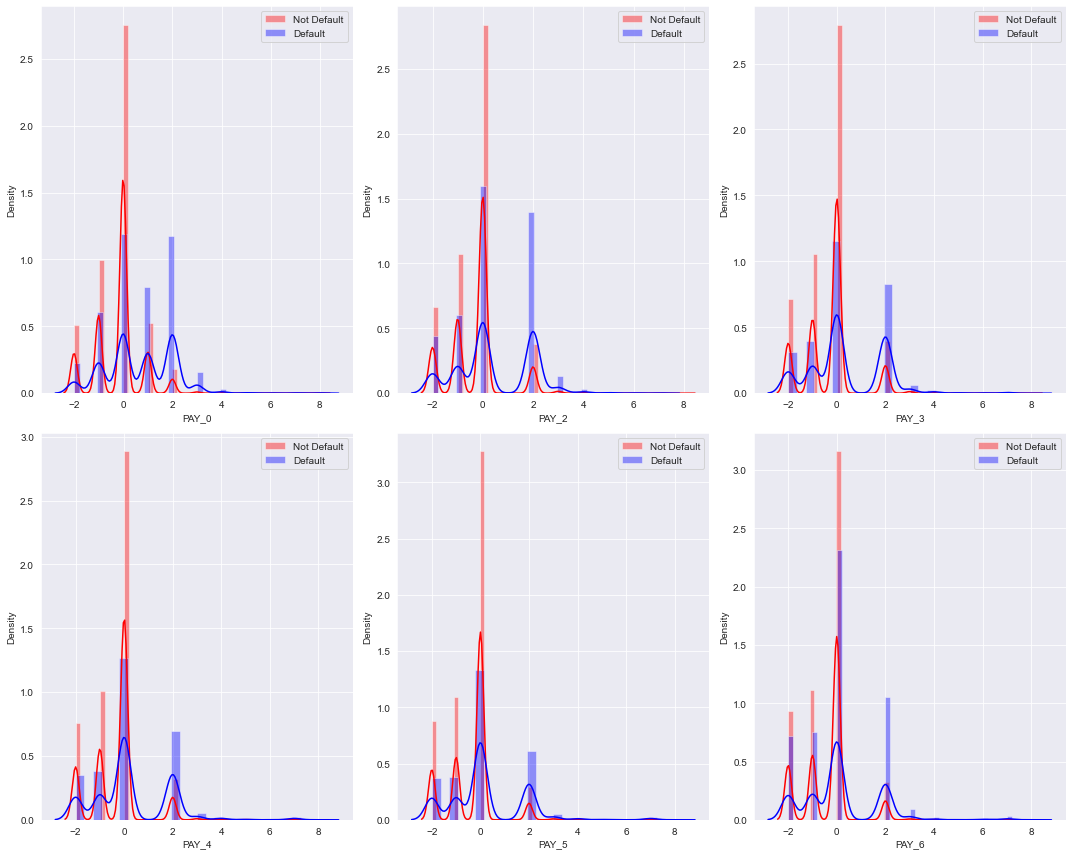

In [40]:
features = ['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]

a = plt.figure(figsize=(15, 12))

for i, j in enumerate(features):
    a.add_subplot(2, 3, i+1)
    sns.distplot(df[j][df.default_payment_next_month == 0], label='Not Default', color='r')
    sns.distplot(df[j][df.default_payment_next_month == 1],  label='Default', color='b')
    plt.legend()
    a.tight_layout()

In [41]:
# df['PAY_0'] = df['PAY_0'].replace(0, "Paid_On_Time")
# df['PAY_0'] = df['PAY_0'].replace(-1, "Duly_1")
# df['PAY_0'] = df['PAY_0'].replace(1, "Delay_1")
# df['PAY_0'] = df['PAY_0'].replace(-2, "Duly_2")
# df['PAY_0'] = df['PAY_0'].replace(2, "Delay_2")
# df['PAY_0'] = df['PAY_0'].replace(3, "Delay_3")
# df['PAY_0'] = df['PAY_0'].replace(4, "Delay_4")
# df['PAY_0'] = df['PAY_0'].replace(5, "Delay_5")
# df['PAY_0'] = df['PAY_0'].replace(8, "Delay_8")
# df['PAY_0'] = df['PAY_0'].replace(6, "Delay_6")
# df['PAY_0'] = df['PAY_0'].replace(7, "Delay_7")
df['PAY_0'].value_counts()

 0    10324
-1     3937
 1     2608
-2     1923
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: PAY_0, dtype: int64

In [42]:
 df['PAY_0'].value_counts()

 0    10324
-1     3937
 1     2608
-2     1923
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: PAY_0, dtype: int64

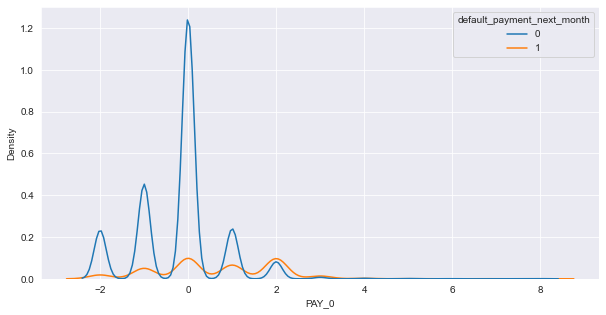

In [43]:
plt.figure(figsize=(10, 5))
exploration_plot('PAY_0')

In [44]:
 df['PAY_2'].value_counts()

 0    11043
-1     4174
 2     2776
-2     2643
 3      229
 4       69
 1       23
 5       21
 7       11
 6       10
 8        1
Name: PAY_2, dtype: int64

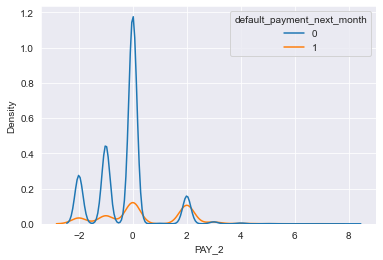

In [45]:
exploration_plot('PAY_2')

In [46]:
 df['PAY_3'].value_counts()

 0    11056
-1     4125
-2     2868
 2     2670
 3      173
 4       55
 7       22
 5       14
 6       13
 8        2
 1        2
Name: PAY_3, dtype: int64

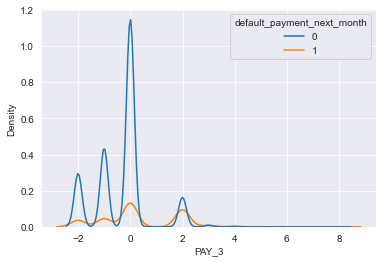

In [47]:
exploration_plot('PAY_3')

In [48]:
 df['PAY_4'].value_counts()

 0    11542
-1     3949
-2     3047
 2     2208
 3      135
 4       51
 7       43
 5       19
 6        4
 8        2
Name: PAY_4, dtype: int64

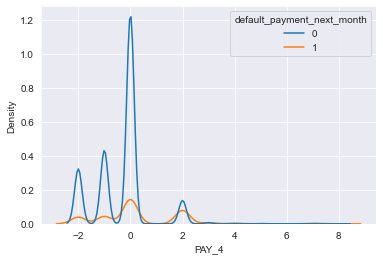

In [49]:
exploration_plot('PAY_4')

In [50]:
 df['PAY_5'].value_counts()

 0    11852
-1     3840
-2     3193
 2     1869
 3      132
 4       53
 7       45
 5       13
 6        2
 8        1
Name: PAY_5, dtype: int64

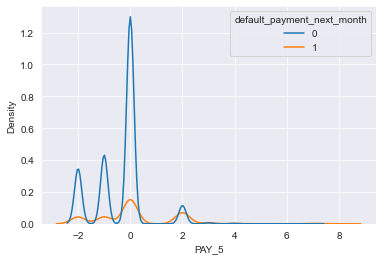

In [51]:
exploration_plot('PAY_5')

In [52]:
 df['PAY_6'].value_counts()

 0    11450
-1     3970
-2     3427
 2     1934
 3      130
 7       34
 4       30
 6       15
 5        8
 8        2
Name: PAY_6, dtype: int64

__Kelompok 3 (yang fiturnya BILL_AMT) =__ 
- 'BILL_AMT1', 
- 'BILL_AMT2',
- 'BILL_AMT3', 
- 'BILL_AMT4',
- 'BILL_AMT5', 
- 'BILL_AMT6'

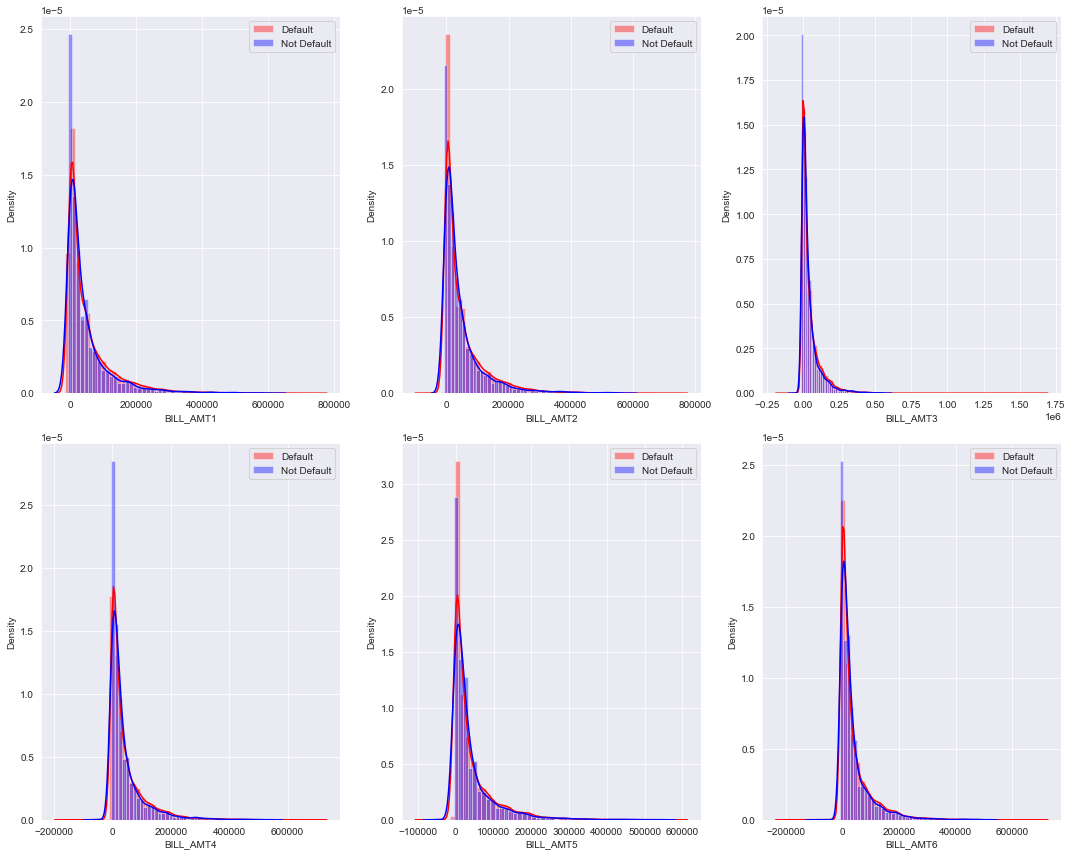

In [53]:
features = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

c = plt.figure(figsize=(15, 12))

for i, j in enumerate(features):
    c.add_subplot(2, 3, i+1)
    sns.distplot(df[j][df.default_payment_next_month == 0], label='Default', color='r')
    sns.distplot(df[j][df.default_payment_next_month == 1],  label='Not Default', color='b')
    plt.legend()
    c.tight_layout()

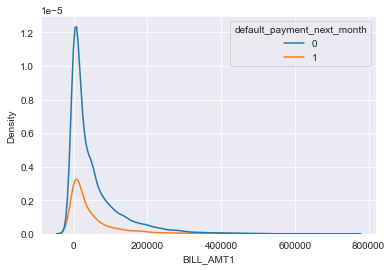

In [54]:
exploration_plot('BILL_AMT1')

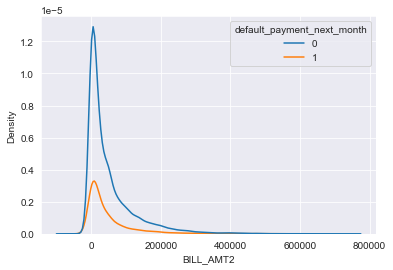

In [55]:
exploration_plot('BILL_AMT2')

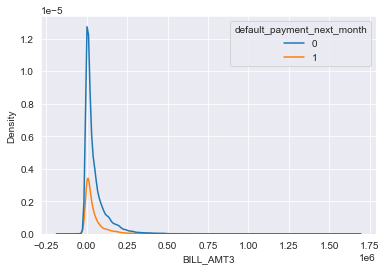

In [56]:
exploration_plot('BILL_AMT3')

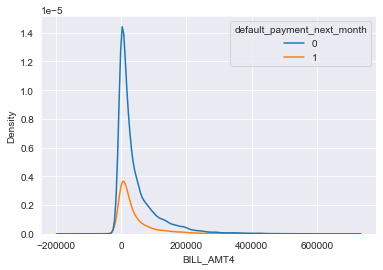

In [57]:
exploration_plot('BILL_AMT4')

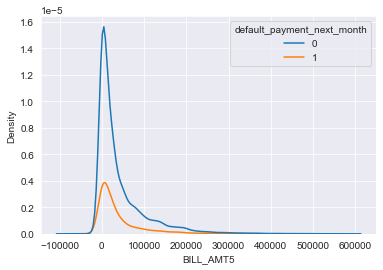

In [58]:
exploration_plot('BILL_AMT5')

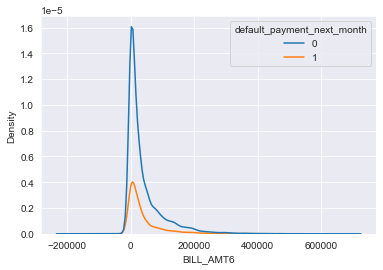

In [59]:
exploration_plot('BILL_AMT6')

In [60]:
df['default_payment_next_month'] = df['default_payment_next_month'].replace( "No Default", 0)
df['default_payment_next_month'] = df['default_payment_next_month'].replace( "Default", 1)
df['SEX'] = df['SEX'].replace( "Male",1)
df['SEX'] = df['SEX'].replace("Female",2)
df['EDUCATION'] = df['EDUCATION'].replace("Graduate_School",1)
df['EDUCATION'] = df['EDUCATION'].replace("University",2)
df['EDUCATION'] = df['EDUCATION'].replace("High_School",3)
df['EDUCATION'] = df['EDUCATION'].replace("Others",4)
df['EDUCATION'] = df['EDUCATION'].replace("Unknown",5)
df['EDUCATION'] = df['EDUCATION'].replace("Unknown",6)
df['EDUCATION'] = df['EDUCATION'].replace("Nothing",0)
df['MARRIAGE'] = df['MARRIAGE'].replace("Married",1)
df['MARRIAGE'] = df['MARRIAGE'].replace("Single",2)
df['MARRIAGE'] = df['MARRIAGE'].replace("Divorced",3)
df['MARRIAGE'] = df['MARRIAGE'].replace("Unknown",4)

df[df < 0].count()

ID                               0
LIMIT_BAL                        0
SEX                              0
EDUCATION                        0
MARRIAGE                         0
AGE                              0
PAY_0                         5860
PAY_2                         6817
PAY_3                         6993
PAY_4                         6996
PAY_5                         7033
PAY_6                         7397
BILL_AMT1                      416
BILL_AMT2                      476
BILL_AMT3                      463
BILL_AMT4                      483
BILL_AMT5                      470
BILL_AMT6                      499
PAY_AMT1                         0
PAY_AMT2                         0
PAY_AMT3                         0
PAY_AMT4                         0
PAY_AMT5                         0
PAY_AMT6                         0
default_payment_next_month       0
dtype: int64

In [61]:
df[df['BILL_AMT6']<0].head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
94    2384      60000    1          2         1   35      0      0      0   
128   1012     410000    2          1         1   31     -1     -1      2   
180  29578     450000    1          1         1   42     -1      2     -1   
184   4485     160000    2          1         2   23      0      0      0   
219   5663     200000    2          2         1   33     -1     -1     -1   

     PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
94       0     -1     -1      22226      18597      13801       8038   
128      2     -2     -2       2744       2041        630       -736   
180     -1     -1     -2       3566        240       1718       2284   
184      0      0     -2     151246     155926     113767      50531   
219     -1      0      0       7770       3266        200      15845   

     BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
94        7340       -153      1292      2245       161      7340         0   
128      -1591      -2303      2051         5       266       266       253   
180       -561      -1477         0      2000      2300         0       590   
184        -10         -5     10517     20258     20157         0         0   
219      15845        -39      5846       200     15845         0         0   

     PAY_AMT6  default_payment_next_month  
94      20341                           0  
128      6384                           0  
180         0                           1  
184      3570                           0  
219         0                           0

In [62]:
a = df[(df["BILL_AMT6"]<0) &
      (df["BILL_AMT5"]<0) &
      (df["BILL_AMT4"]<0) &
      (df["BILL_AMT3"]<0) &
      (df["BILL_AMT2"]<0) &
      (df["BILL_AMT1"]<0) ]
a.count()

ID                            56
LIMIT_BAL                     56
SEX                           56
EDUCATION                     56
MARRIAGE                      56
AGE                           56
PAY_0                         56
PAY_2                         56
PAY_3                         56
PAY_4                         56
PAY_5                         56
PAY_6                         56
BILL_AMT1                     56
BILL_AMT2                     56
BILL_AMT3                     56
BILL_AMT4                     56
BILL_AMT5                     56
BILL_AMT6                     56
PAY_AMT1                      56
PAY_AMT2                      56
PAY_AMT3                      56
PAY_AMT4                      56
PAY_AMT5                      56
PAY_AMT6                      56
default_payment_next_month    56
dtype: int64

In [94]:
rajin = a[(a['default_payment_next_month'] == 1) ]
rajin.count()

ID                            18
LIMIT_BAL                     18
SEX                           18
EDUCATION                     18
MARRIAGE                      18
AGE                           18
PAY_0                         18
PAY_2                         18
PAY_3                         18
PAY_4                         18
PAY_5                         18
PAY_6                         18
BILL_AMT1                     18
BILL_AMT2                     18
BILL_AMT3                     18
BILL_AMT4                     18
BILL_AMT5                     18
BILL_AMT6                     18
PAY_AMT1                      18
PAY_AMT2                      18
PAY_AMT3                      18
PAY_AMT4                      18
PAY_AMT5                      18
PAY_AMT6                      18
default_payment_next_month    18
dtype: int64

In [95]:
rajin

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
365    27555      40000    1          2         1   55      1     -2     -2   
1287   23642     180000    2          1         2   35      1     -2     -2   
2208     547     220000    2          1         1   41      1     -2     -2   
2948    3758     180000    2          1         2   27      1     -2     -2   
3300    1975     130000    1          1         2   25      1     -2     -2   
5187    2009     360000    2          2         1   32      1     -2     -2   
5397   17826      50000    1          2         2   25     -2     -2     -2   
5857   26514     280000    2          1         1   63     -2     -2     -2   
6053   19313     200000    2          1         2   34      1     -2     -2   
6065    7415      10000    2          2         2   23      1     -2     -2   
8542   23649     200000    2          1         2   43     -2     -2     -2   
9839    4778      20000    1          1         2   23      1     -2     -2   
11665  21148     130000    1          2         1   42      1     -2     -2   
15116  20154     240000    2          2         1   37     -2     -2     -2   
15264  27355     120000    1          3         2   31      1     -2     -2   
17313  29492     320000    1          1         2   31      1     -2     -2   
20293  14350     340000    1          2         1   43      1     -2     -2   
20776   3946     500000    2          1         2   35     -2     -2     -2   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
365       -2     -2     -2       -150       -540       -930      -1320   
1287      -2     -2     -2        -18        -18        -18        -18   
2208      -2     -2     -2        -65        -65        -65        -65   
2948      -2     -2     -2       -200       -200       -200       -200   
3300      -2     -2     -2      -2000      -2000      -2000      -2000   
5187      -2     -2     -2       -301       -301       -301       -301   
5397      -2     -2     -2      -1587      -5174      -2587      -2587   
5857      -2     -2     -2       -200       -200       -200       -200   
6053      -2     -2     -2      -2113      -2113      -2113      -2113   
6065      -2     -2     -2      -1000      -1000      -1000      -1000   
8542      -2     -2     -2       -109       -109       -109       -109   
9839      -2     -2     -2       -348       -738       -738      -1518   
11665     -2     -2     -2        -52        -52        -52        -52   
15116     -2     -2     -2       -150       -150       -150       -150   
15264     -2     -2     -2        -94      -2090      -2390      -2390   
17313     -2     -2     -2      -6029      -9119     -46127     -50616   
20293     -2     -2     -2        -15        -15        -15        -15   
20776     -2     -2     -2        -73        -73        -73        -73   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
365        -1710      -2100         0         0         0         0         0   
1287         -18        -18         0         0         0         0         0   
2208         -65       -200         0         0         0         0         0   
2948        -200       -200         0         0         0         0         0   
3300       -2000      -2000         0         0         0         0         0   
5187        -301       -301         0         0         0         0         0   
5397       -2587      -2587         0         0         0         0         0   
5857        -200       -200         0         0         0         0         0   
6053       -2113      -2113         0         0         0         0         0   
6065       -1000      -1000         0         0         0         0         0   
8542        -109       -109         0         0         0         0         0   
9839       -1518      -1518         0         0         0         0         0   
11665        -52        -52         0         0 

In [64]:
def exploration_plot(x):
    target = 'default_payment_next_month'
    
    if a[x].dtype == 'O':
        sns.set_style("whitegrid")
        sns.countplot(x, hue=target, data=a)
        plt.show()

    else:
        sns.set_style("darkgrid")
        sns.kdeplot(x, hue=target, data=a)
        plt.show()

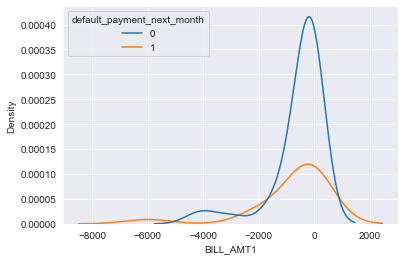

In [65]:
exploration_plot('BILL_AMT1')

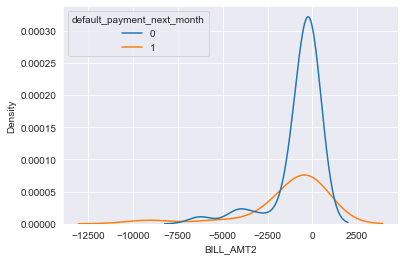

In [66]:
exploration_plot('BILL_AMT2')

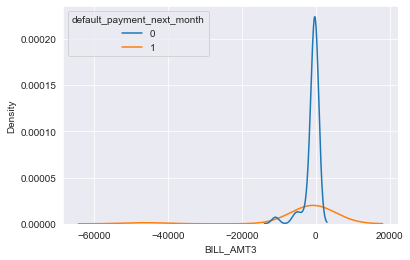

In [67]:
exploration_plot('BILL_AMT3')

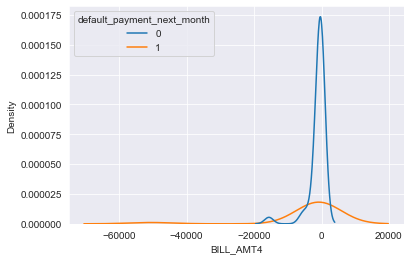

In [68]:
exploration_plot('BILL_AMT4')

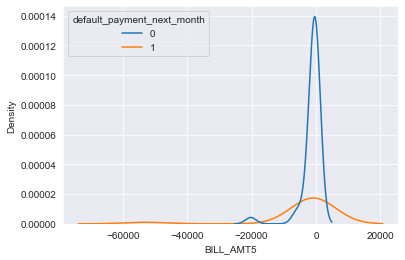

In [69]:
exploration_plot('BILL_AMT5')

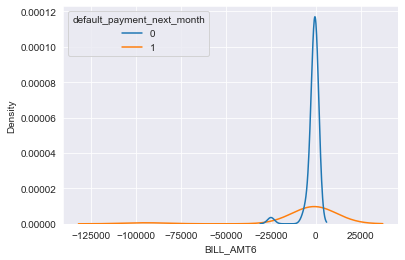

In [70]:
exploration_plot('BILL_AMT6')

__Kelompok 4 (yang fiturnya PAY_AMT) =__ 
- 'PAY_AMT1',
- 'PAY_AMT2', 
- 'PAY_AMT3', 
- 'PAY_AMT4', 
- 'PAY_AMT5', 
- 'PAY_AMT6'

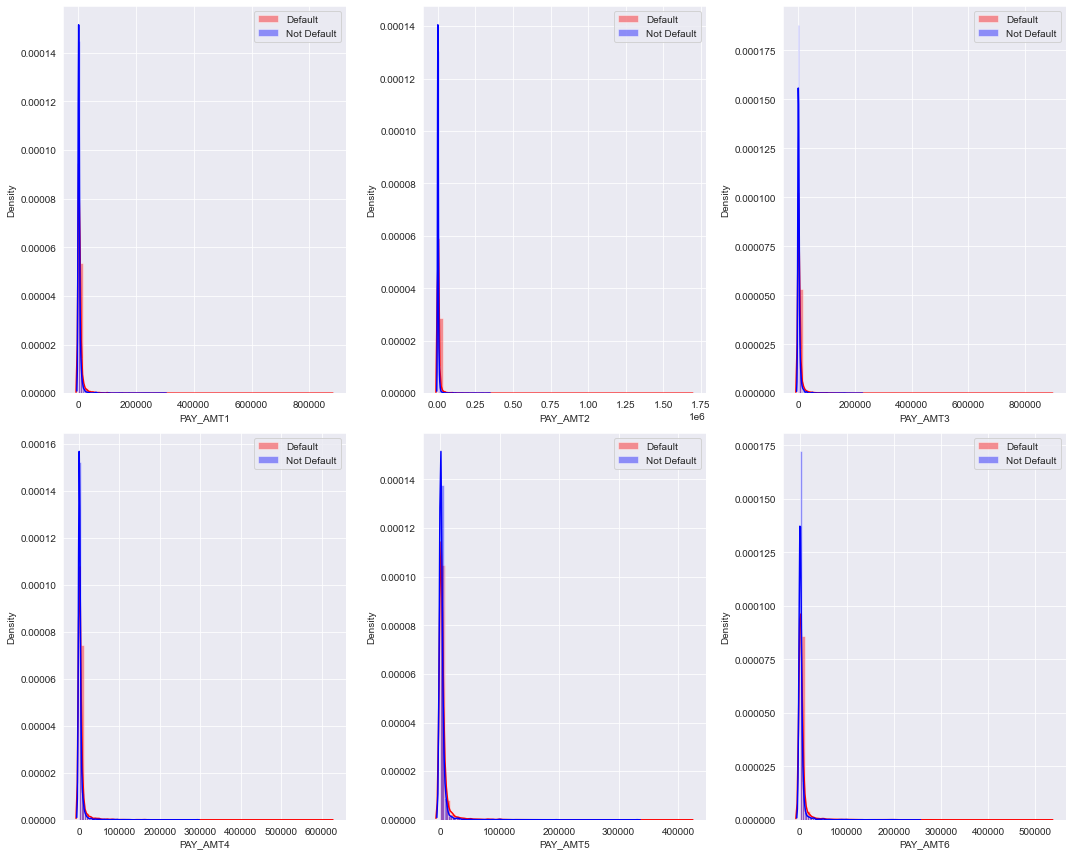

In [71]:
features = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

x = plt.figure(figsize=(15, 12))

for i, j in enumerate(features):
    x.add_subplot(2, 3, i+1)
     
    sns.distplot(df[j][df.default_payment_next_month == 0], label='Default', color='r')
    sns.distplot(df[j][df.default_payment_next_month == 1],  label='Not Default', color='b')
    plt.legend()
    x.tight_layout()

In [72]:
def exploration_plot(x):
    target = 'default_payment_next_month'
    
    if df[x].dtype == 'O':
        sns.set_style("whitegrid")
        sns.countplot(x, hue=target, data=df)
        plt.show()

    else:
        sns.set_style("darkgrid")
        sns.kdeplot(x, hue=target, data=df)
        plt.show()

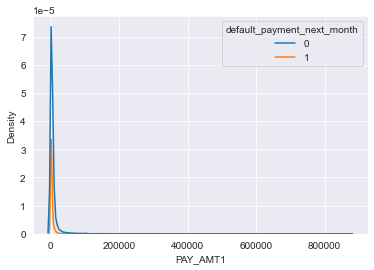

In [73]:
exploration_plot('PAY_AMT1')

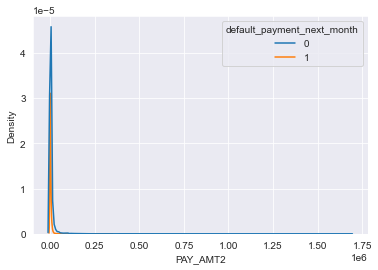

In [74]:
exploration_plot('PAY_AMT2')

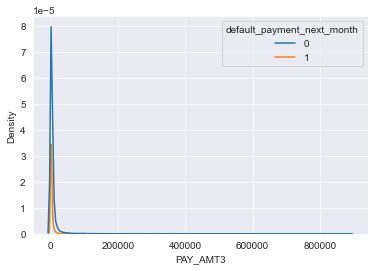

In [75]:
exploration_plot('PAY_AMT3')

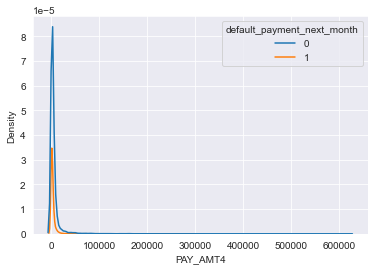

In [76]:
exploration_plot('PAY_AMT4')

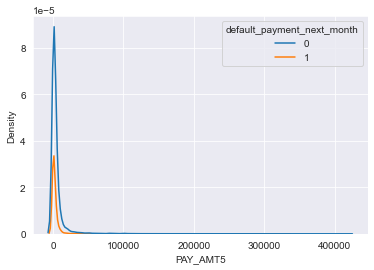

In [77]:
exploration_plot('PAY_AMT5')

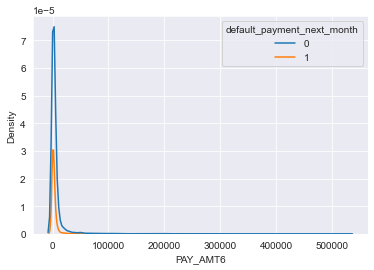

In [78]:
exploration_plot('PAY_AMT6')

# Bivariate Analysis

### Korelasi Heatmap

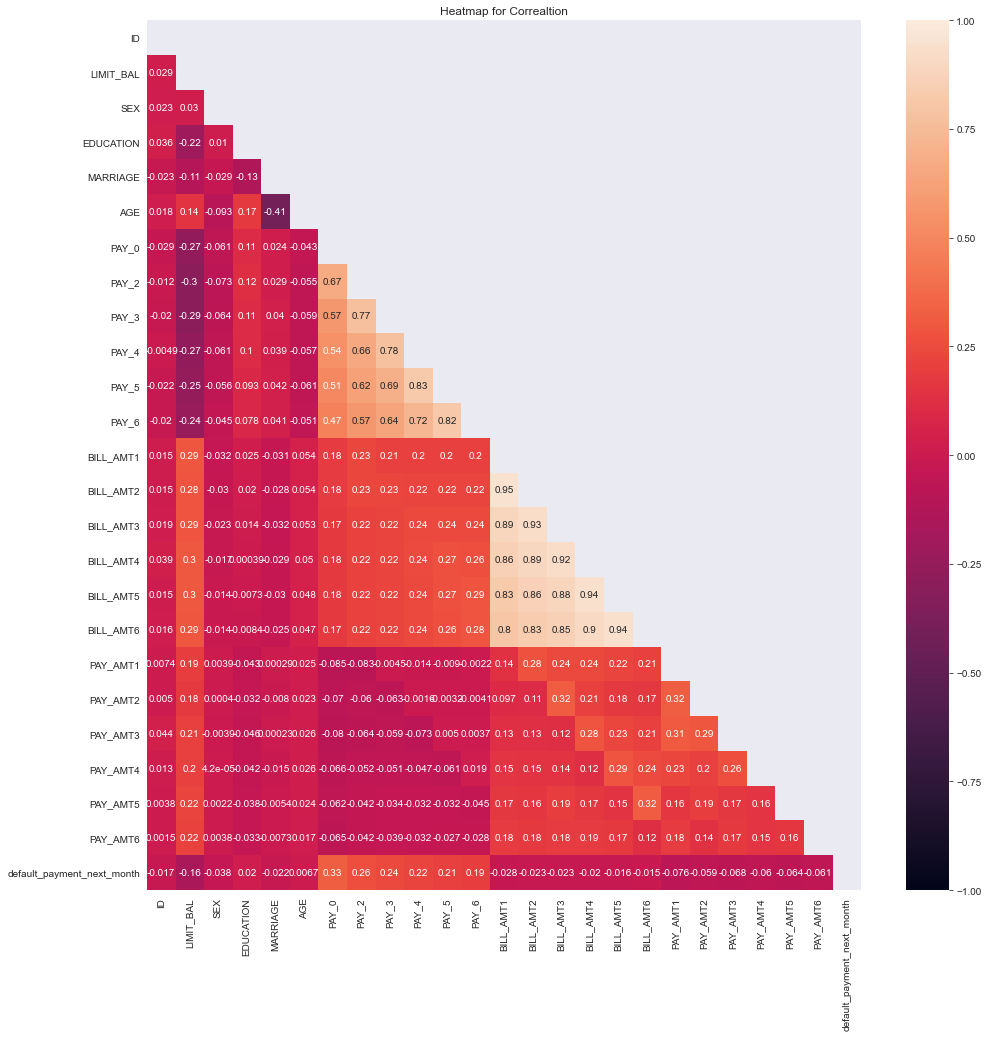

In [79]:
plt.figure(figsize=(16,16))
p = df.corr()
mask = np.triu(np.ones_like(p)) 
sns.heatmap(df.corr(),vmin=-1,vmax=1, mask=mask, annot = True)
plt.title('Heatmap for Correaltion')
plt.show()

In [80]:
p['default_payment_next_month'].sort_values(ascending =False)

default_payment_next_month    1.000000
PAY_0                         0.325851
PAY_2                         0.263546
PAY_3                         0.235930
PAY_4                         0.220079
PAY_5                         0.208783
PAY_6                         0.188985
EDUCATION                     0.020397
AGE                           0.006664
BILL_AMT6                    -0.015480
BILL_AMT5                    -0.015790
ID                           -0.016701
BILL_AMT4                    -0.020185
MARRIAGE                     -0.021894
BILL_AMT2                    -0.022796
BILL_AMT3                    -0.022824
BILL_AMT1                    -0.028493
SEX                          -0.037634
PAY_AMT2                     -0.059409
PAY_AMT4                     -0.059574
PAY_AMT6                     -0.061206
PAY_AMT5                     -0.063666
PAY_AMT3                     -0.067720
PAY_AMT1                     -0.076042
LIMIT_BAL                    -0.159163
Name: default_payment_nex

<AxesSubplot:>

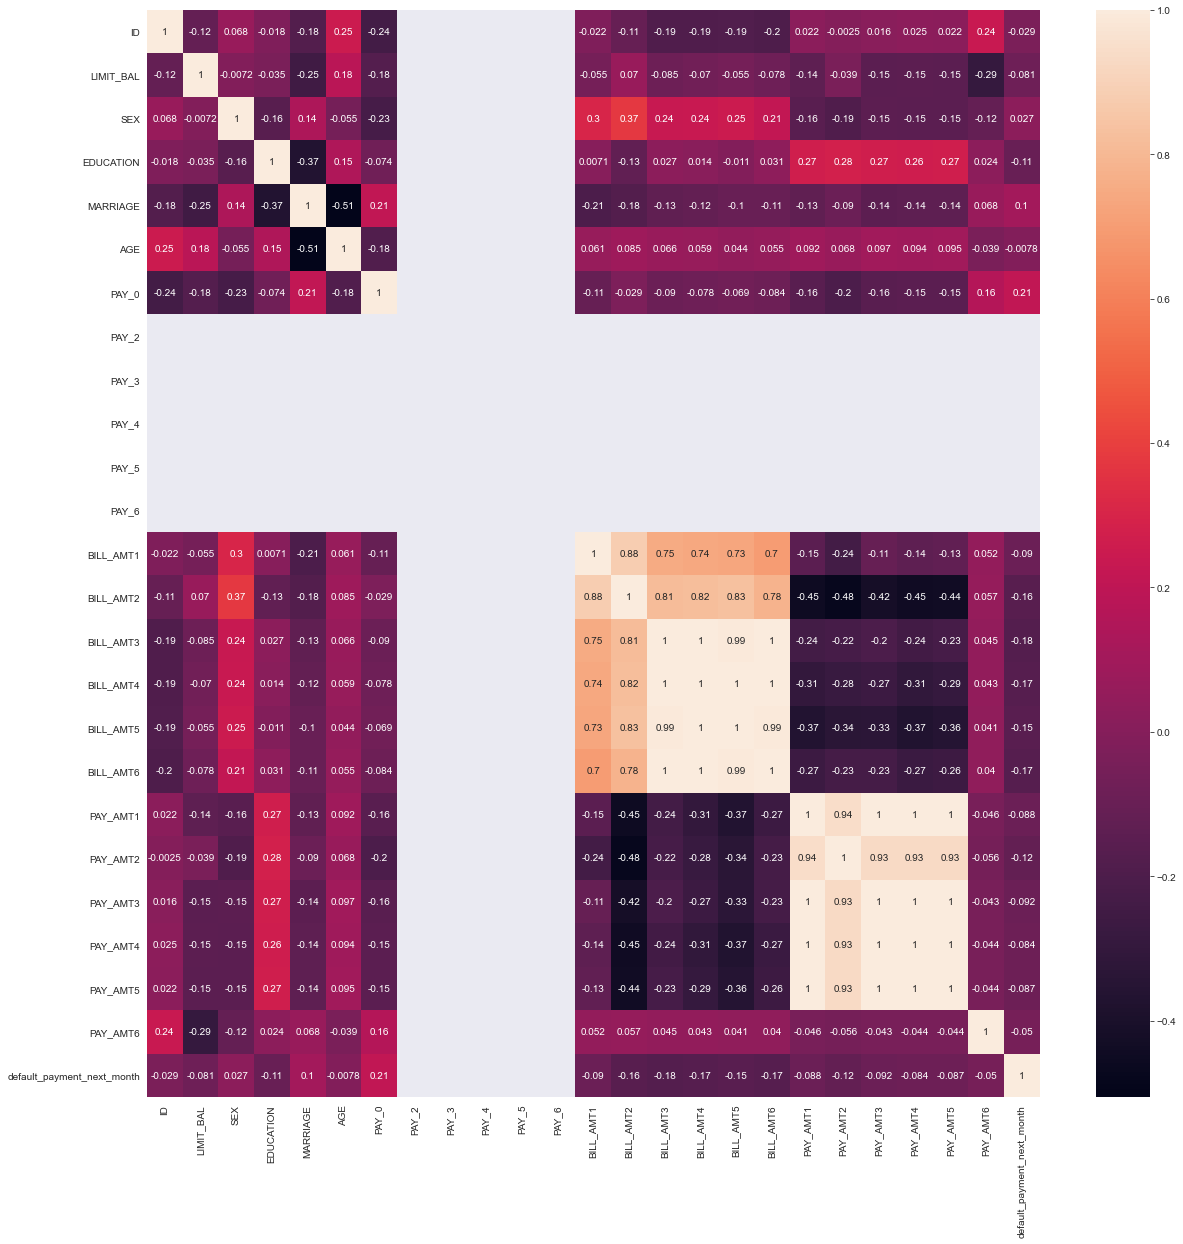

In [81]:
correlations = a.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [82]:
correlations['default_payment_next_month'].sort_values(ascending =False)

default_payment_next_month    1.000000
PAY_0                         0.209718
MARRIAGE                      0.104049
SEX                           0.027381
AGE                          -0.007791
ID                           -0.029482
PAY_AMT6                     -0.049589
LIMIT_BAL                    -0.081002
PAY_AMT4                     -0.084135
PAY_AMT5                     -0.086919
PAY_AMT1                     -0.088464
BILL_AMT1                    -0.089691
PAY_AMT3                     -0.092303
EDUCATION                    -0.105503
PAY_AMT2                     -0.119712
BILL_AMT5                    -0.154698
BILL_AMT2                    -0.162700
BILL_AMT4                    -0.167631
BILL_AMT6                    -0.168786
BILL_AMT3                    -0.175445
PAY_2                              NaN
PAY_3                              NaN
PAY_4                              NaN
PAY_5                              NaN
PAY_6                              NaN
Name: default_payment_nex

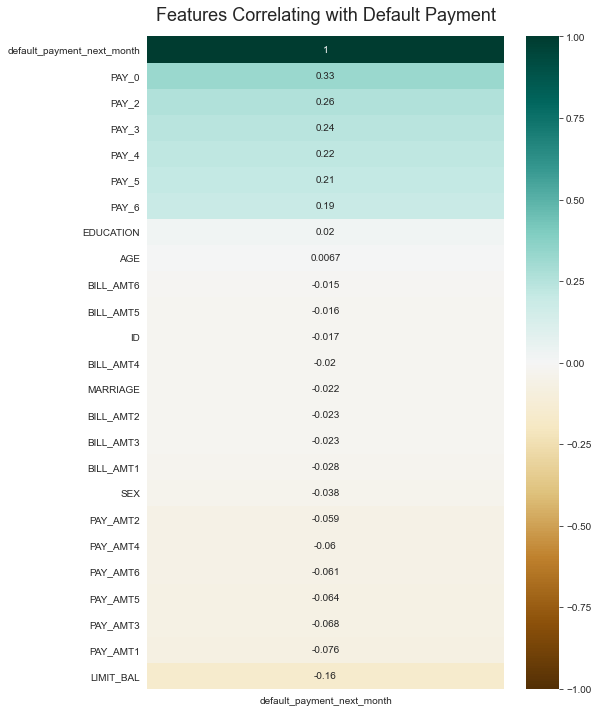

In [83]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['default_payment_next_month']].sort_values(by='default_payment_next_month', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Default Payment', fontdict={'fontsize':18}, pad=16);

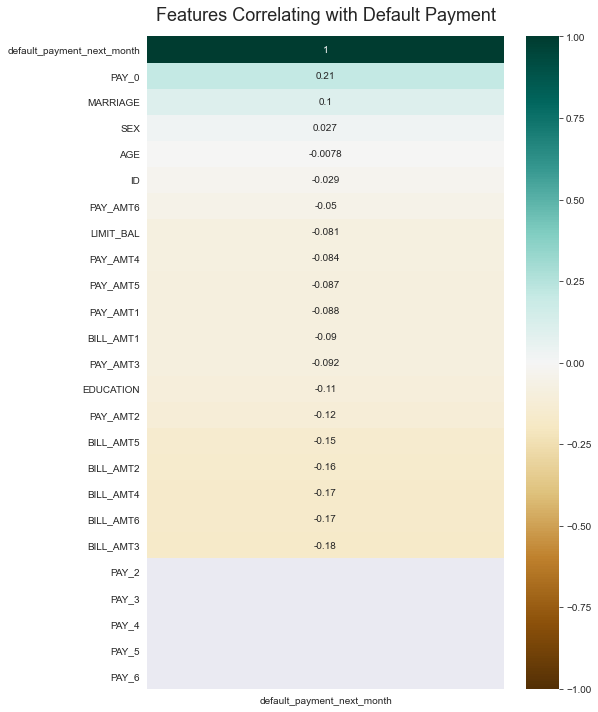

In [84]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(a.corr()[['default_payment_next_month']].sort_values(by='default_payment_next_month', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Default Payment', fontdict={'fontsize':18}, pad=16);

<Figure size 1080x1080 with 0 Axes>

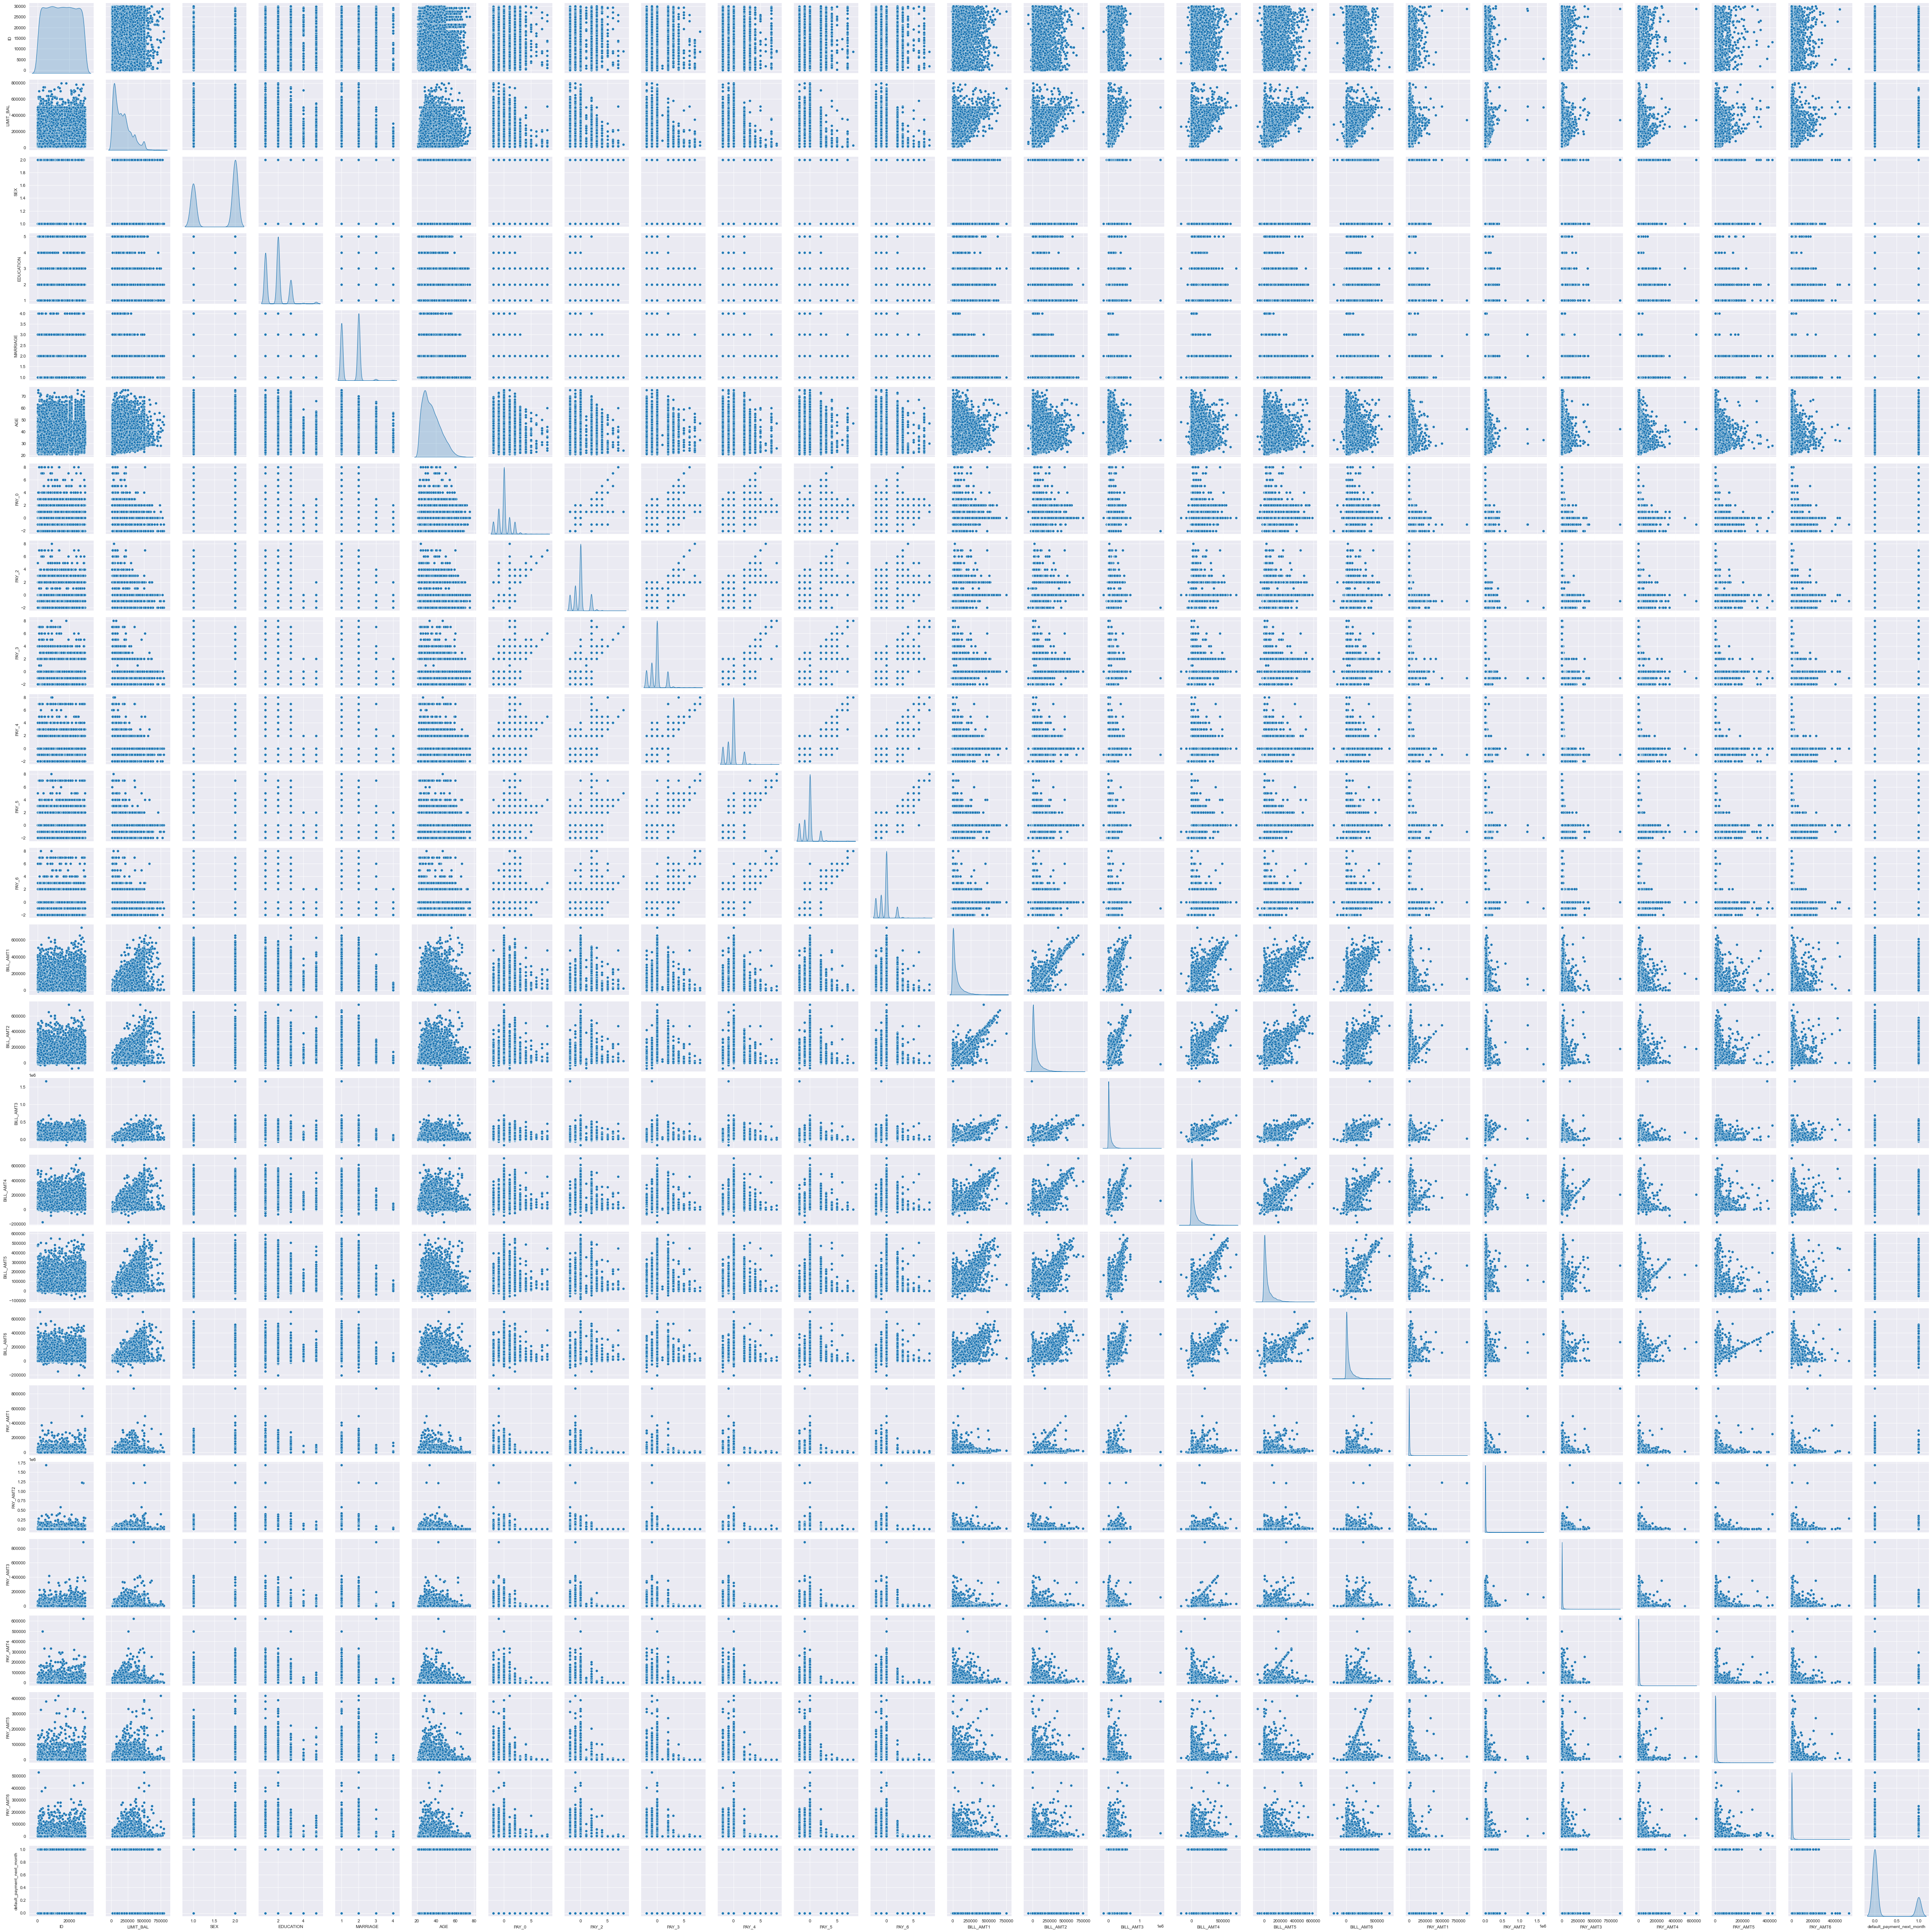

In [85]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

__KESIMPULAN__

- Dataset terdiri dari 25 kolom dan 21000 baris. dan tidak terdapat null value dan tidak ada data duplikat.
- Setiap kolom telah memiliki tipe data yang sesuai, setiap kolom memiliki value berupa numerik dan tipe datanya sudah sesuai yaitu int.
- Terdapat penamaan kolom yang kurang selaras yaitu setelah kolom PAY_0 langsung ke PAY_2, sementara pada BILL_AMT dan PAY_AMT diawali dengan 1 bukan 0 dan definisi kolomnya urut sesuai defngan BILL_AMT dan PAY_AMT
- Kolom ID akan didrop karena merupakan identifier dari tiap baris yang nilainya unik dan tidak dapat memberikan informasi apa-apa dalam analisis.
- Terdapat nilai yang belum terdefinisi dalam dataset kolom PAY_0 - PAY_6, yaitu nilai 0.
- Terdapat nilai yang belum terdefinisi dalam dataset kolom MARRIAGE, yaitu nilai 0.
- Terdapat nilai minus pada nilai min untuk kolom BILL_AMT1 - BILL_AMT6, dimana seharusnya untuk jumlah bill statement tidak ada yang bernilai negatif.
- Kolom SEX, EDUCATION, MARRIAGE, PAY_0 - PAY_6, default_payment_next_month tampaknya merupakan data kategorikal yang direpresentasikan menggunakan numerik (label encod).
- Hanya kolom AGE yang tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
- Kolom SEX, EDUCATION, MARRIAGE, PAY_0 - PAY_6, default_payment_next_month tampaknya merupakan data kategorikal yang direpresentasikan menggunakan numerik.
- Kolom LIMIT_BAL, BILL_AMT1 - BILL_AMT6, PAY_AMT1 - PAY_AMT6 sepertinya right skewed.
- Kolom LIMIT_BAL, PAY_AMT1 - PAY_AMT6 memiliki nilai mean > median dan selisih percentil 75 dengan max sangat jauh.
- BILL_AMT1 - BILL_AMT6 memiliki nilai mean > median.
- Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh perempuan (kolom SEX) dan orang dengn status single (kolom MARRIAGE).
- Korelasi features dengan target default_payment_next_month (memiliki korelasi positif lemah dengan LIMIT_BAL, Pay_0, Pay_1, Pay_2, Pay_3, Pay_4, Pay_5, Pay_6 yang selanjutkan akan digunakan pada model. Namun, memiliki korelasi positif cukup kuat terhadap feature apapun.
- Terdapat banyak sekali feature yang saling berkolerasi positif cukup kuat (BILL_AMT dengan BILL_AMT dan PAY_AMT dengan PAY_AMT) dan ada juga feature yang berkorelasi negatif lemah (AGE - MARRIAGE)
-  Kolom default_payment_next_month yang merupakan label pada dataset menunjukkan class imbalance dengan persentase kategori 0 (not default) sebesar 78%.

__PALNNING NEXT STEP__

1. Kita akan merename PAY_0 menjadi PAY_1
2. Kolom ID merupakan identifier dari tiap baris yang nilainya unik dan tidak dapat memberikan informasi apa-apa dalam analisis.
3. Terdapat nilai-nilai yang belum terdefinisi pada kolom EDUCATION, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, MARRIAGE (akan digabung unknown)
4. Terdapat nilai minus pada nilai min untuk kolom BILL_AMT1 - BILL_AMT6, dimana seharusnya untuk jumlah bill statement tidak ada yang bernilai negatif (akan di drop) __atau__ Perlu eksplorasi lebih dalam mengenai BILL_AMT yang minus ini karena jika didrop akan mengurangi jumlah data cukup banyak, kemungkinan BILL_AMT bernilai negatif karena kelebihan bayar tagihan pada bulan sebelumnya.
5. Tampak disetiap numerikal data pada dataset memiliki outlier semua pada visualisasi Boxplot, untuk penanganan yang dilakukan yaitu dengan memfilter outlier dengan menggunakan z score, kemudian akan dilakukan pengecekan distribusi dari data setelah difilter dengan z score atau menggunakan IQR (akan dilakukan pengematan pebandingan hasil akurasi nantinya).
6. Berdasarkan visualisasi KernelDestinyEstimationplot, semua numerical data pada dataset tampak skew ke kanan semua, Penanganannya mungkin akan dilakukan log transformation untuk mengatasi distribusi yang skew tersebut setelah dilakukan (filtrasi outlier)
7. Kita akan memilih salah satu fitur baik PAY atau BILLAMT dan PAYAMT karena kedua jenis fitur sebab akibat sehingga bisa dipilih salah satunya (akan kami pertimbangkan lebih lanjut dan kemungkinan akan kami coba juga tanpa drop untk jadi bahan perbandingan akurasi kedepannya)

__DATA OUTLIERS__

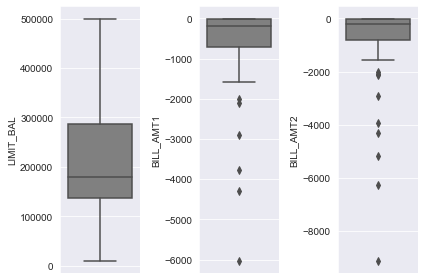

In [86]:
nums = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2']
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=a[nums[i]], color='gray', orient='v')
    plt.tight_layout()

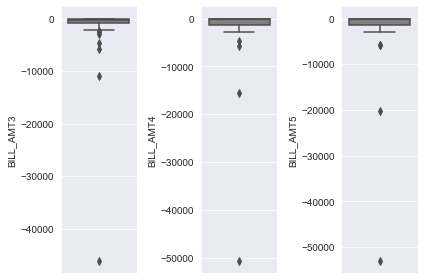

In [87]:
nums = ['BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5']
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=a[nums[i]], color='gray', orient='v')
    plt.tight_layout()

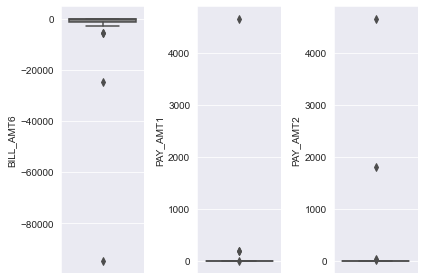

In [88]:
nums = ['BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2']
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=a[nums[i]], color='gray', orient='v')
    plt.tight_layout()

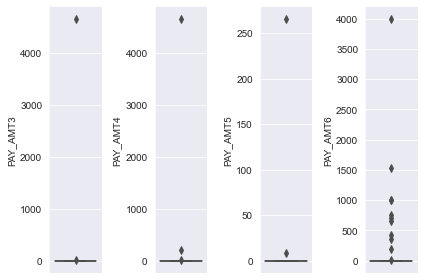

In [89]:
nums = ['PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=a[nums[i]], color='gray', orient='v')
    plt.tight_layout()

#### IQR

In [90]:
# print(f'Jumlah baris sebelum memfilter outlier: {len(a)}')

# for col in ['LIMIT_BAL', 'AGE', 
#        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
#   Q1 = a[col].quantile(0.25)
#   Q3 = a[col].quantile(0.75)
#   IQR = Q3-Q1
#   low_limit = Q1 - 1.5*IQR
#   high_limit = Q3 + 1.5*IQR
#   dtrain = a[(a[col] >= low_limit) & (a[col] <= high_limit)]

# print(f'Jumlah baris setelah memfilter outlier: {len(dtrain)}')

In [91]:
# Jumlah baris sebelum memfilter outlier: 19621
# Jumlah baris setelah memfilter outlier: 17717

#menghapus 9,7 persen

skew skali pakai z-score,

SyntaxError: invalid syntax (<ipython-input-91-28d0e8d37013>, line 6)

#### __ Z-SCORE__

In [ ]:
# nums_updated = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
#        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]

In [ ]:
# from scipy import stats

# print(f'Jumlah baris sebelum memfilter outlier: {len(a)}')

# filtered_entries = np.array([True] * len(a))

# for col in ['LIMIT_BAL', 'AGE', 
#        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
#     zscore = abs(stats.zscore(a[col])) # hitung absolute z-scorenya
#     filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
# dtarin = a[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

# print(f'Jumlah baris setelah memfilter outlier: {len(dtarin)}')

# Jumlah baris sebelum memfilter outlier: 19621
# Jumlah baris setelah memfilter outlier: 17236

FITUR TERTENTUR SAJA
# Jumlah baris sebelum memfilter outlier: 19621
# Jumlah baris setelah memfilter outlier: 17491